In [1]:
# Let's import what we gonna to use firstly.
import nltk
import pandas as pd


from bs4 import BeautifulSoup
import re


# All the imports for the sentimental analysis

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq
from wordcloud import WordCloud

sns.set(color_codes=True)

%matplotlib inline

In [2]:
dataset = pd.read_csv("Combined_dataset.csv", sep=',',low_memory=False)
original_data= pd.read_csv("sample.csv", sep=',',low_memory=False)

In [3]:
dataset.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US      2975964  R1NBG94582SJE2  B00I01JQJM       860486164   
1          US     23526356  R273DCA6Y0H9V7  B00TCO0ZAA       292641483   
2          US     52764145   RQVOXO7WUOFK6  B00B7733E0        75825744   
3          US     47348933  R1KWKSF21PO6HO  B006ZN4U34       789352955   
4          US     33680700  R38H3UO1J190GI  B00HUEBGMU        19067902   

                                       product_title product_category  \
0  GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ o...           Camera   
1  Professional 58mm Center Pinch Lens Cap for CA...           Camera   
2  Spy Tec Z12 Motion Activated Intelligent Secur...           Camera   
3  Celestron UpClose G2 10x25 Monocular, Black (7...           Camera   
4  Vidpro XM-L Wired Lavalier microphone - 20' Au...           Camera   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0            5              0            0    N                 Y   
1            5              0            0    N                 Y   
2            2              1            1    N                 Y   
3            5              0            0    N                 Y   
4            5              1            1    N                 Y   

                                review_headline  \
0                                    Five Stars   
1                                    Love it!!!   
2                    Another Motion Detect Fail   
3           Exactly what I wanted and expected.   
4  Good mic at a Good Price...Not Canon Though.   

                                         review_body review_date  
0                                                 ok    31/08/15  
1          Perfect, even sturdier than the original!    31/08/15  
2  If the words, &#34;Cheap Chinese Junk&#34; com...    31/08/15  
3  Exactly what I wanted and expected. Perfect fo...    31/08/15  
4  I will look past the fact that they tricked me...    31/08/15

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        2099 non-null   object
 1   customer_id        2099 non-null   int64 
 2   review_id          2099 non-null   object
 3   product_id         2099 non-null   object
 4   product_parent     2099 non-null   int64 
 5   product_title      2099 non-null   object
 6   product_category   2099 non-null   object
 7   star_rating        2099 non-null   int64 
 8   helpful_votes      2099 non-null   int64 
 9   total_votes        2099 non-null   int64 
 10  vine               2099 non-null   object
 11  verified_purchase  2099 non-null   object
 12  review_headline    2099 non-null   object
 13  review_body        2099 non-null   object
 14  review_date        2099 non-null   object
dtypes: int64(5), object(10)
memory usage: 246.1+ KB


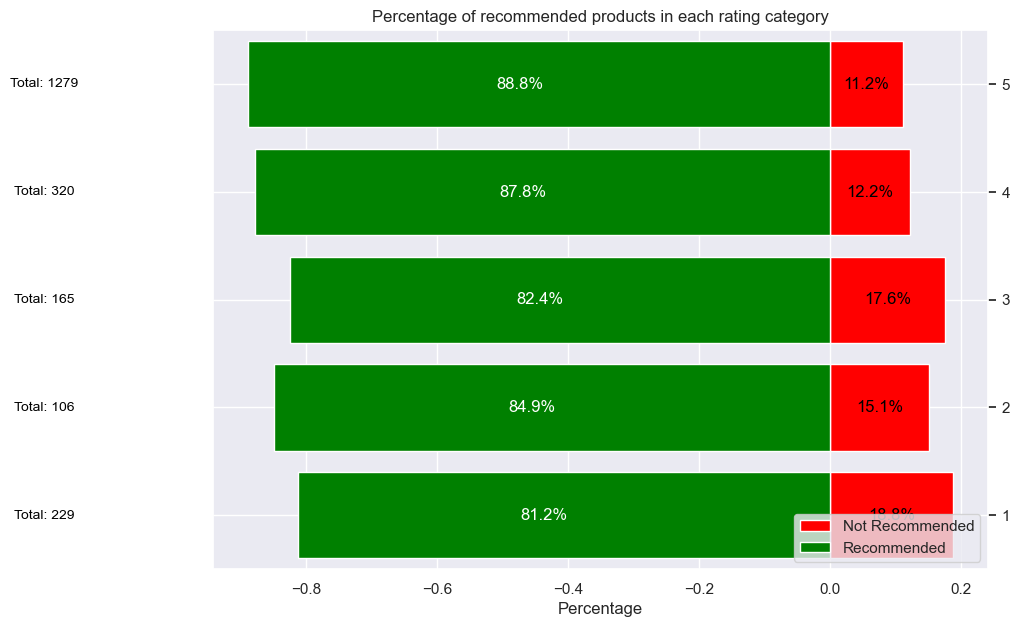

In [5]:
rating_recommended_percentage = dataset.groupby("star_rating")["helpful_votes"].value_counts(normalize=True).unstack().fillna(0)
rating_recommended_percentage['Recommended'] = 1 - rating_recommended_percentage[1]
rating_counts = dataset['star_rating'].value_counts()

rating_counts = rating_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (rating, count) in enumerate(rating_counts.items()):
    ax.text(-1.2, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)
ax.barh(rating_recommended_percentage.index.astype(str), rating_recommended_percentage[1], color='red', label='Not Recommended')

# Not Recommended
ax.barh(rating_recommended_percentage.index.astype(str), -rating_recommended_percentage['Recommended'], color='green', label='Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(rating_recommended_percentage)))
ax.set_yticklabels(rating_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

ax.set_ylim([-0.5, len(rating_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each rating category")
plt.xlabel("Percentage")
plt.show()

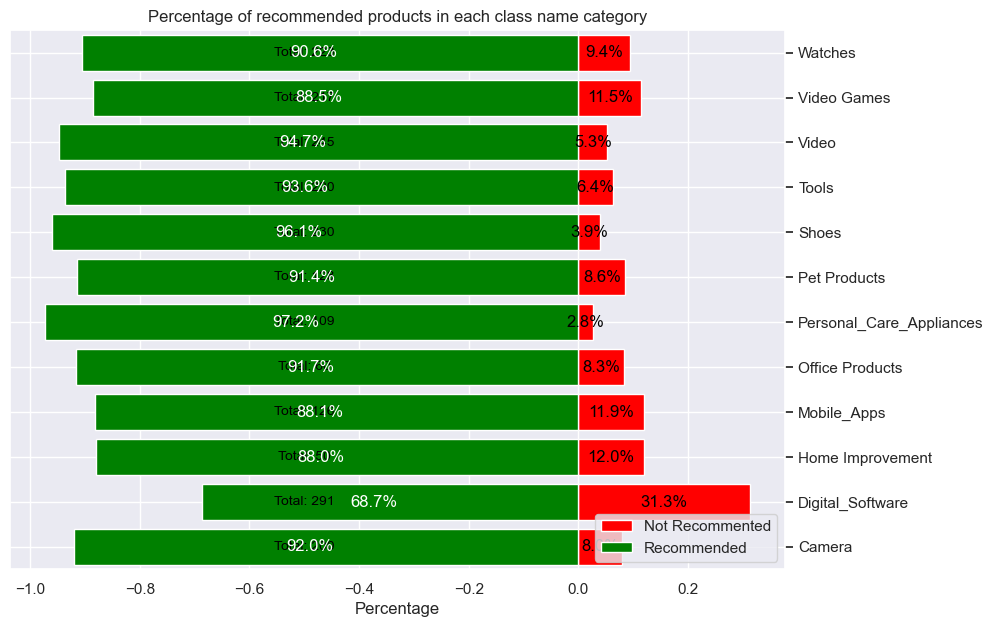

In [6]:
class_name_recommended_percentage = dataset.groupby("product_category")["star_rating"].value_counts(normalize=True).unstack().fillna(0)
class_name_recommended_percentage['Not Recommended'] = 1 - class_name_recommended_percentage[1]
class_name_counts = dataset['product_category'].value_counts()

class_name_counts = class_name_counts.sort_index()

# Butterfly chart
fig, ax = plt.subplots(figsize=(10, 7))

for i, (class_name, count) in enumerate(class_name_counts.items()):
    ax.text(-0.5, i, f'Total: {count}', ha='center', va='center', color='black', fontsize=10)

# Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), class_name_recommended_percentage[1], color='red', label='Not Recommented')

# Not Recommended
ax.barh(class_name_recommended_percentage.index.astype(str), -class_name_recommended_percentage['Not Recommended'], color='green', label='Recommended')

for p in ax.patches:
    width = p.get_width()
    if width != 0:
        label_x = width / 2 if width > 0 else (width / 2) - 0.03  # Adjusted label_x for better alignment
        label_color = 'white' if abs(width) > 0.5 else 'black'
        ax.annotate(f'{abs(width):.1%}', (label_x, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color=label_color)

ax.yaxis.tick_right()
ax.set_yticks(range(len(class_name_recommended_percentage)))
ax.set_yticklabels(class_name_recommended_percentage.index.astype(str))
ax.legend(loc='lower right')

# Set ylim for better alignment
ax.set_ylim([-0.5, len(class_name_recommended_percentage) - 0.5])

plt.title("Percentage of recommended products in each class name category")
plt.xlabel("Percentage")
plt.show()

/var/folders/4q/ld56_1kn62z9px05kfw3hnhw0000gn/T/ipykernel_1471/3443602626.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset["star_rating"])


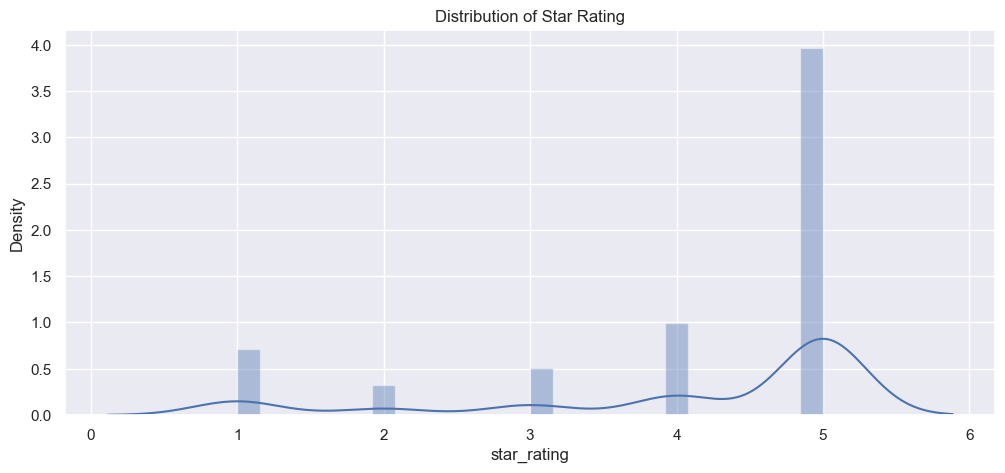

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
plt.title("Distribution of Star Rating")
ax = sns.distplot(dataset["star_rating"])

In [8]:
data=pd.DataFrame(dataset)
col=["review_body","star_rating"]
data=data.loc[:,col]


In [9]:
data.head()


review_body  star_rating
0                                                 ok            5
1          Perfect, even sturdier than the original!            5
2  If the words, &#34;Cheap Chinese Junk&#34; com...            2
3  Exactly what I wanted and expected. Perfect fo...            5
4  I will look past the fact that they tricked me...            5

In [10]:
data['star_rating'].value_counts().sort_index(ascending=False)

star_rating
5    1279
4     320
3     165
2     106
1     229
Name: count, dtype: int64

In [11]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['star_rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

review_body  star_rating  \
0                                                 ok            5   
1          Perfect, even sturdier than the original!            5   
2  If the words, &#34;Cheap Chinese Junk&#34; com...            2   
3  Exactly what I wanted and expected. Perfect fo...            5   
4  I will look past the fact that they tricked me...            5   

   sentiment_score sentiment  
0                1  POSITIVE  
1                1  POSITIVE  
2                0  NEGATIVE  
3                1  POSITIVE  
4                1  POSITIVE

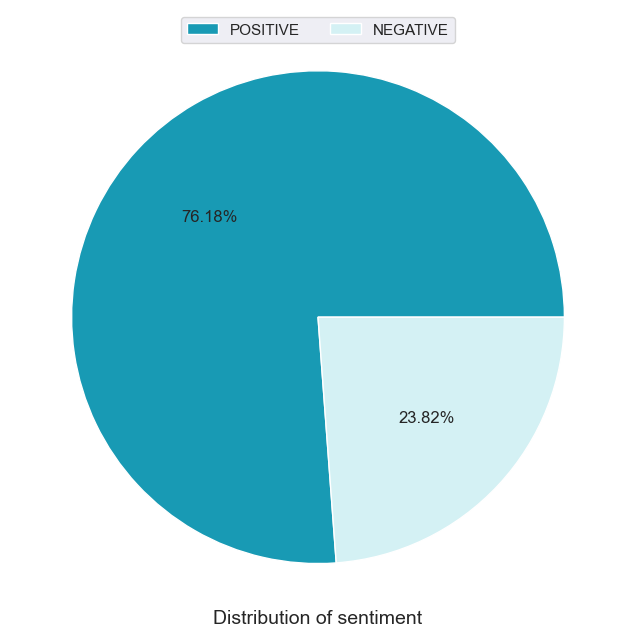

In [12]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [13]:
all_words = pd.Series(' '.join(data['review_body']).split())


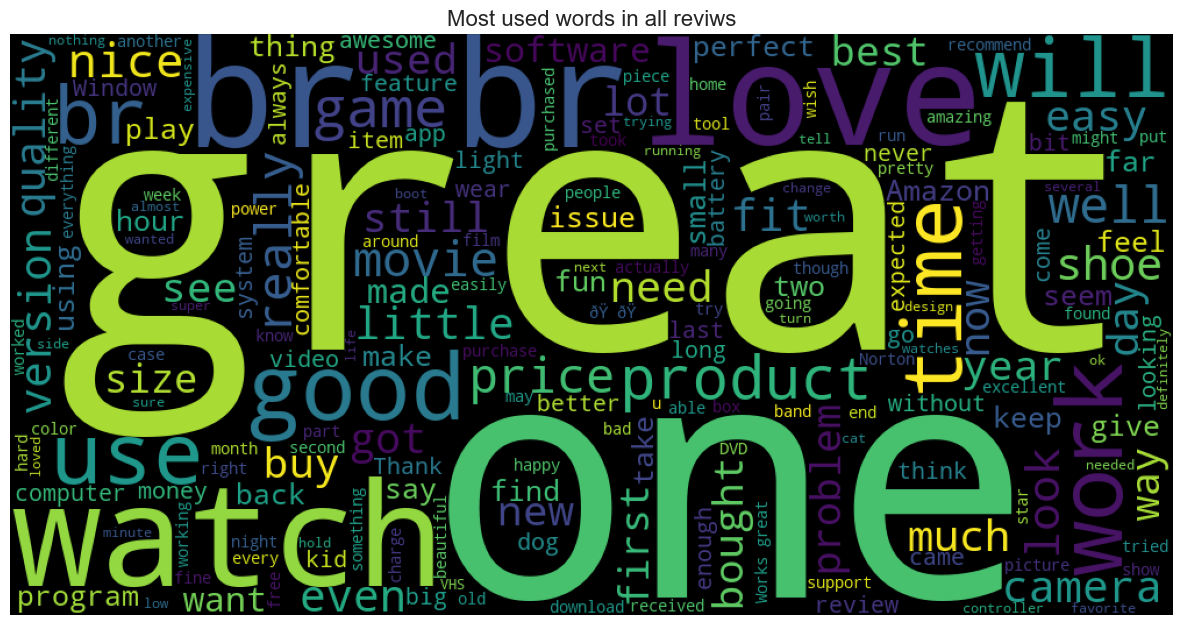

In [14]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in all reviws", size=16)

plt.axis("off")
plt.show()

In [15]:
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['review_body']).split())

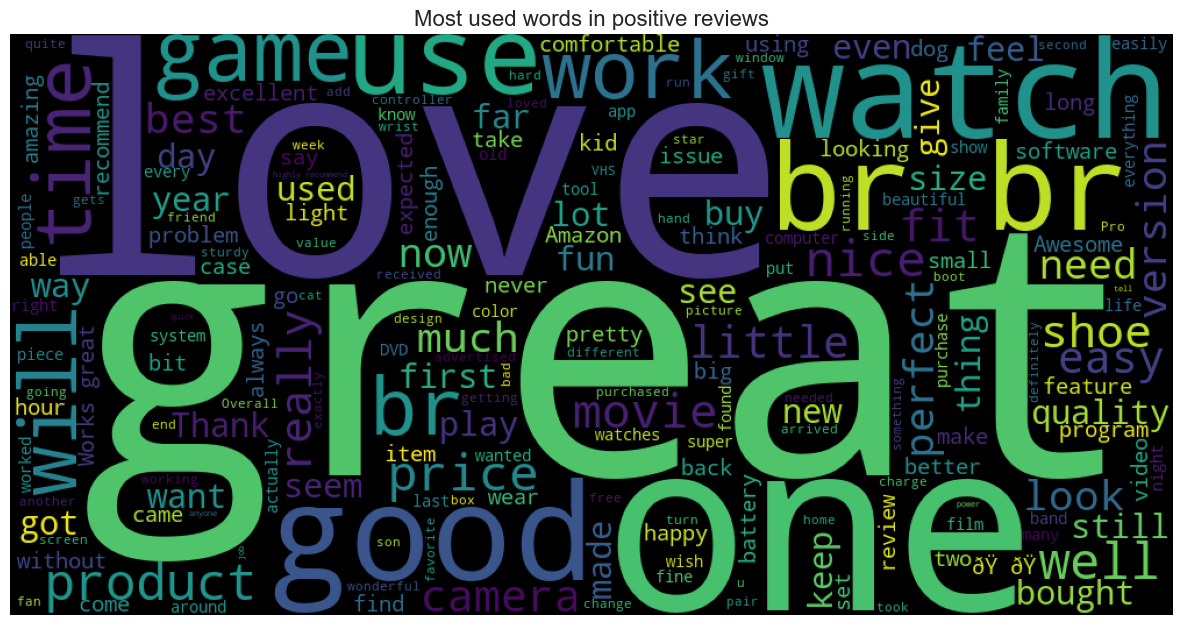

In [16]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

In [17]:
# get words used negative reivews 
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['review_body']).split())

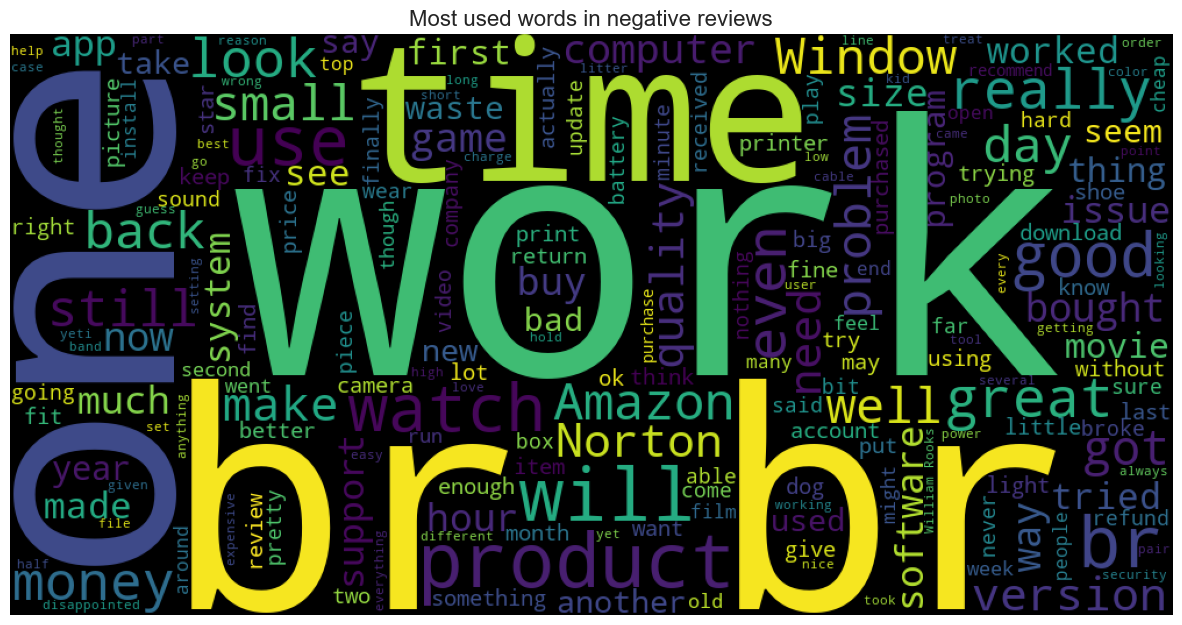

In [18]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()

In [19]:
df = pd.read_csv("sample.csv", sep=',',low_memory=False)

In [20]:
df.head()

marketplace customer_id       review_id  product_id  product_parent  \
0          US    49033728  R1P1G5KZ05H6RD  6302503213     748506413.0   
1          US    17857748  R106N066IUN8ZV  B000059PET     478710180.0   
2          US    25551507   R7WTAA1S5O7D9   788812807     981002815.0   
3          US    21025041  R32HFMVWLYOYJK  6302509939     333219811.0   
4          US    40943563   RWT3H6HBVAL6G  B00JENS2BI     538101194.0   

                                       product_title product_category  \
0               The Night They Saved Christmas [VHS]            Video   
1  Hamlet / Kline, New York Shakespeare Festival ...            Video   
2  Nascar Dual Powered Calculator (Solar & Batter...            Video   
3  The Man From U.N.C.L.E, Volume 19: The Brain K...            Video   
4                    Playboy Video Party Jokes [VHS]            Video   

   star_rating  helpful_votes  total_votes vine verified_purchase  \
0          5.0            0.0          0.0    N                 Y   
1          5.0            0.0          0.0    N                 Y   
2          4.0            0.0          0.0    N                 Y   
3          5.0            0.0          0.0    N                 Y   
4          3.0            0.0          0.0    N                 N   

                 review_headline  \
0               Very satisfied!!   
1  The most talented actor ever!   
2                     Four Stars   
3                     Five Stars   
4          HOT women, dumb jokes   

                                         review_body review_date  
0  Fast shipping. Pleasure to deal with. Would re...  2015-08-31  
1  Kevin Kline is the most versatile, multi-talen...  2015-08-31  
2                                        great movie  2015-08-31  
3                   i love the martin landau episode  2015-08-31  
4  Y'know what this reminded me of? Those sketch ...  2015-08-31

In [21]:
df.head()
convert_dict = {'product_title': str,
                'review_body': str
                }
df = df.astype(convert_dict)
print(df.dtypes)

marketplace           object
customer_id           object
review_id             object
product_id            object
product_parent       float64
product_title         object
product_category      object
star_rating          float64
helpful_votes        float64
total_votes          float64
vine                  object
verified_purchase     object
review_headline       object
review_body           object
review_date           object
dtype: object


In [22]:
df.drop(['marketplace','customer_id','review_id','product_id','product_parent','helpful_votes','total_votes','vine','review_date'], axis=1, inplace=True)

In [23]:
df['star_rating'].value_counts()

star_rating
5.0    203986
4.0     67827
3.0     32468
1.0     25659
2.0     18022
Name: count, dtype: int64

In [24]:

def mapping(x):
    if x > 4: return 1
    if x <= 4: return 0

df['label']= df['star_rating'].apply(mapping)

df = df[['review_body', 'label','star_rating']]

In [25]:
from collections.abc import Mapping
for ele in df['star_rating'].values:
    mapping(ele)

In [26]:
df.head()

review_body  label  star_rating
0  Fast shipping. Pleasure to deal with. Would re...    1.0          5.0
1  Kevin Kline is the most versatile, multi-talen...    1.0          5.0
2                                        great movie    0.0          4.0
3                   i love the martin landau episode    1.0          5.0
4  Y'know what this reminded me of? Those sketch ...    0.0          3.0

In [27]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
df['tokenized_sentences_nltk'] = df['review_body'].apply(nltk.word_tokenize)
df['tokenized_sentences_naive'] = df['review_body'].apply(lambda s: s.split(' '))

from nltk.tokenize import word_tokenize as WordTokenizer
def custom_tokenize(text):
    if not text:
        print('The text to be tokenized is a None type. Defaulting to blank string.')
        text = ''
    return word_tokenize(text)
# dataset['review_body'] = dataset.column.apply(custom_tokenize)
# We can tokenize a sentence using a tokenizer or splitting by space simply.
df['tokenized_sentences_nltk'] = df['review_body'].apply(nltk.word_tokenize) # it take some times
df['tokenized_sentences_naive'] = df['review_body'].apply(lambda s: s.split(' '))

[nltk_data] Downloading package stopwords to /Users/arun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/arun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/arun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/arun/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [28]:
stopwords = set(nltk.corpus.stopwords.words())
print(stopwords)

{'даже', "wasn't", '不成', 'nd', '常常', 'altres', 'কাছ', 'hin', 'habría', 'triinšestdeset', 'بات', 'vsem', 'איתך', '应当', 'raha', 'houverá', 'перед', 'berean', 'namreč', 'नयाँ', 'ظ', 'yəni', 'wollen', 'suatu', 'toate', '哈哈', 'बीचमा', 'jima', 'kolikšne', '不断', '允许', 'noi', 'issi', 'שלו', 'thereby', 'takimile', 'sunteţi', 'طرا', 'uneia', 'porque', 'sometimes', 'sənin', 'ikkje', 'iets', 'četrtimi', 'okoli', '愿意', 'nikakršnem', 'থাকা', 'met', 'gewesen', 'merekalah', 'eurak', 'which', 'দিন', 'würden', 'سبت', 'יוכל', 'هو', 'dvajsetih', 'तेस्कारण', '一下', 'कहिलेकाहीं', 'third', 'obenj', 'želi', 'needs', 'alt', 'el', 'berkeinginan', 'استحال', 'facciano', '为何', 'үшін', 'निम्ति', 'foi', 'барои', 'vsemi', 'ala ', 'لستم', 'агар', 'štirinajstima', '以上', 'هاء', '先后', 'shan', 'ғұрлы', 'dvaindvajsetih', '要', 'meyakini', 'drugem', 'kakršnima', 'štiriindvajset', 'bitartean', '相同', 'kunnen', 'eta', '之后', 'זאת', 'teidät', 'selbst', 'menyatakan', 'atare', 'horiei', 'сізден', 'ضحوة', 'medse', 'dimaksudkan', 'এতে

In [29]:
def clean_stopwords(sentence):
    res = []
    for word in sentence:
        if word not in stopwords:
            res.append(word)
    return res
    # return [w if w not in stopwords for w in sentence]

df['tokenized_sentences_nltk_remove_stopwords'] = df['tokenized_sentences_nltk'].apply(clean_stopwords)

In [30]:
pd.set_option('display.max_colwidth', 300)

In [31]:
df[['review_body', 'tokenized_sentences_nltk', 'tokenized_sentences_naive', 'tokenized_sentences_nltk_remove_stopwords','star_rating']].head()

review_body  \
0                                                                                                                                                                                                                                         Fast shipping. Pleasure to deal with. Would recommend. A+++. Thanks!   
1                                                                                                                Kevin Kline is the most versatile, multi-talented actor ever.  No matter what he does, it's done perfectly.  Wish he'd get more parts while we still have him with us.  I just love this man!   
2                                                                                                                                                                                                                                                                                                  great movie   
3                                                                                                                                                                                                                                                                             i love the martin landau episode   
4  Y'know what this reminded me of? Those sketch comedy-style features from the '70s like &#34;The Groove Tube&#34; and &#34;Can I Do It Till I Need Glasses?&#34;, with the only real difference being that this video is, well, shot on video and features what are, arguably, a hotter caliber of sexy w...   

                                                                                                                                                                                                                                                                                      tokenized_sentences_nltk  \
0                                                                                                                                                                                                                    [Fast, shipping, ., Pleasure, to, deal, with, ., Would, recommend, ., A+++, ., Thanks, !]   
1                                                                [Kevin, Kline, is, the, most, versatile, ,, multi-talented, actor, ever, ., No, matter, what, he, does, ,, it, 's, done, perfectly, ., Wish, he, 'd, get, more, parts, while, we, still, have, him, with, us, ., I, just, love, this, man, !]   
2                                                                                                                                                                                                                                                                                               [great, movie]   
3                                                                                                                                                                                                                                                                      [i, love, the, martin, landau, episode]   
4  [Y'know, what, this, reminded, me, of, ?, Those, sketch, comedy-style, features, from, the, '70s, like, &, #, 34, ;, The, Groove, Tube, &, #, 34, ;, and, &, #, 34, ;, Can, I, Do, It, Till, I, Need, Glasses, ?, &, #, 34, ;, ,, with, the, only, real, difference, being, that, this, video, is, ,, we...   

                                                                                                                                                                                                                                                                                     tokenized_sentences_naive  \
0                                                                                                                                                                                                                              [Fast, shipping., Pleasure, to, deal, with., Would, recommend., A+++., Thanks!]   
1    

In [32]:
cleaned_texts = df['tokenized_sentences_nltk_remove_stopwords'].values
labels = df['label'].values

In [33]:
word_frequency = {} 
word_energy = {}


for text, label in zip(cleaned_texts, labels):
    for word in text:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
            
        if label == 1:
            if word not in word_energy:
                word_energy[word] = 1
            else:
                word_energy[word] += 1
        else:
            if word not in word_energy:
                word_energy[word] = -1
            else:
                word_energy[word] -= 1

In [34]:
for word in word_energy:
    word_energy[word] /= word_frequency[word]

In [35]:
reliable_word_energy = {}
for word in word_energy:
    # we assume that the energies would be reliable only for words that appear more than 500 times in our corpus. 
    if word_frequency[word] > 500: 
        reliable_word_energy[word] = word_energy[word]

In [36]:
top_30_positive_words = [v[0] for v in sorted(reliable_word_energy.items(), key=lambda x: x[1], reverse=True)[:300]]
top_30_negative_words = [v[0] for v in sorted(reliable_word_energy.items(), key=lambda x: x[1], reverse=False)[:300]]

In [37]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
%matplotlib inline

def plot_word_clouds(keywords):
    wordcloud = WordCloud().generate(' '.join(keywords))
    plt.figure(figsize=(1, 1))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

In [38]:
print(top_30_positive_words)

['Hoppy', 'Cisco', 'transfere', 'Died', 'FEATURES', 'B-Western', 'VCI', 'Monogram', 'HIGHLY', 'grandchildren', 'Entertainment', 'MUST', 'BEST', 'Brilliant', 'LOVED', 'WONDERFUL', 'EXCELLENT', 'timeless', "'40s", 'tire', 'Hatton', 'Vol', 'AWESOME', 'Highly', 'SPECIAL', 'all-time', 'cried', 'LOVE', 'WOW', 'NOW', 'unforgettable', 'awsome', 'heartwarming', "'30s", 'Excellent', 'Mack', 'Schindler', 'Bravo', 'finest', 'everytime', 'crisp', 'Marshal', 'Clyde', 'Steele', 'must-have', 'flawless', 'Cassidy', 'enchanting', 'GREAT', 'captivated', 'FUN', 'Thanks', 'Thank', 're-released', 'tuned', 'masterfully', "'em", 'ages', 'EVERY', 'penny', 'perfection', 'BIOS', 'Truly', 'CA', 'hooked', 'favorites', 'SEE', 'searched', 'cry', 're-release', 'Wonderful', 'incredible', 'BUY', 'tears', 'healing', 'must-see', 'superb', 'christmas', 'wonderful', 'Buy', 'awesome', 'brilliantly', 'heartbreaking', 'fabulous', 'astounding', 'WILL', 'amazing', 'PLEASE', 'Boyd', 'favorite', 'Crabbe', 'EVER', 'funniest', 'Bir

In [39]:
print(top_30_negative_words)

['nan', 'waste', 'redeeming', 'forgettable', 'disappointing', 'poorly', 'uneven', 'Save', 'mediocre', 'laughable', 'bland', 'lacks', 'lousy', 'Def', 'misleading', 'worst', 'lame', 'wasted', 'awful', 'miscast', 'pointless', 'mildly', 'tedious', 'Flair', 'disappointment', 'decent', 'contrived', 'turkey', 'dreadful', 'watchable', 'ludicrous', 'drags', 'lacked', 'Otherwise', 'predictable', 'low-budget', 'irritating', 'zero', 'Bulldog', 'insult', 'ridiculous', 'Champions', 'whatsoever', 'NWA', 'terrible', 'B-movie', 'alright', 'horrible', 'holes', 'WCW', 'adequate', 'annoying', 'trite', 'Michaels', 'worse', 'mess', 'weak', 'wooden', 'boring', 'distracting', 'pathetic', 'bothered', 'repetitive', 'stupid', 'rushed', 'pretentious', 'unnecessary', 'dull', 'frustrating', 'Luger', 'unrealistic', 'confusing', 'flat', 'Ric', 'cheap', 'lacking', 'Playmate', 'cliches', 'Unless', 'dumb', 'Mankind', 'premise', 'subplot', 'badly', 'excuse', 'competent', 'fairly', 'poor', 'disgusting', 'desired', 'hokey'

In [40]:
def calc_energies(sentence):
    score = 0
    if len(sentence) != 0:  # Check if the sentence is not empty
        for word in sentence:
            if word in reliable_word_energy:
                score += reliable_word_energy[word]
        score /= len(sentence)  # normalization
    return score

df['sentiment_energy'] = df['tokenized_sentences_nltk_remove_stopwords'].apply(calc_energies)

0.06000000000000005 0.6638330858877166


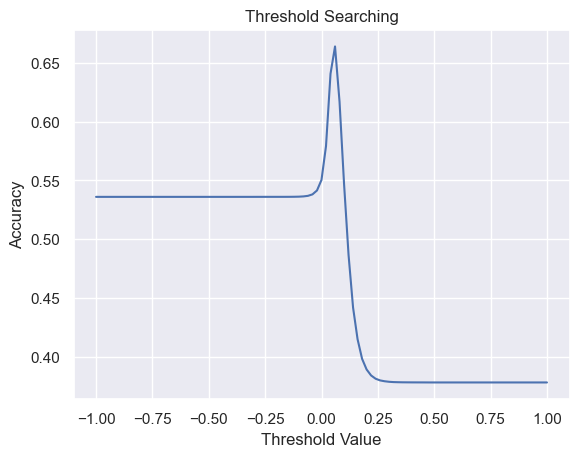

In [41]:
import numpy as np

def threshold_searching(left=-1, right=1, num_thresholds=101):
    record = []
    for i in np.linspace(left, right, num_thresholds):
        record.append(((df['sentiment_energy'] > i).astype('int') == df['label']).sum() / len(df))
    plt.title('Threshold Searching')
    plt.xlabel('Threshold Value')
    plt.ylabel('Accuracy')
    plt.plot(np.linspace(left, right, num_thresholds), record)
    best_train_threshold = np.linspace(left, right, num_thresholds)[record.index(max(record))]
    best_train_accuracy = max(record)
    return best_train_threshold, best_train_accuracy

best_train_threshold, best_train_accuracy = threshold_searching()
print(best_train_threshold, best_train_accuracy)

In [42]:
def our_sentiment_classifier(sentence, threshold=best_train_threshold):
    energy = calc_energies(sentence)
    if energy > threshold:
        return 1
    else:
        return 0

In [43]:
print('prediction', our_sentiment_classifier(['i', 'will', 'not', 'buy', 'it', 'again']))
print('prediction', our_sentiment_classifier(['all-time','AWESOME']))
print('prediction', our_sentiment_classifier(['it', 'is', 'really', 'Wonderful']))

prediction 0
prediction 1
prediction 1


In [44]:
data = pd.read_csv("sample1.csv", sep=',',low_memory=False)

In [45]:
data.drop(['marketplace','customer_id','review_id','star_rating','product_id','product_parent','helpful_votes','total_votes','vine','review_date'], axis=1, inplace=True)

In [46]:
tokanized = {'Hoppy':'10', 'Cisco':'8', 'transfere':'7', 'Died':'7', 'FEATURES':'8', 'B-Western':'7', 
             'VCI':'2', 'Monogram':'4', 'HIGHLY':'10', 'grandchildren':'5', 'Entertainment':'3', 
             'MUST':'4', 'BEST':'7', 'Brilliant':'3', 'LOVED':'1', 'WONDERFUL':'7', 'EXCELLENT':'6', 
             'timeless':'9', "'40s":'8', 'tire':'4', 'Hatton':'4', 'Vol':'7', 'AWESOME':'5', 'Highly':'10', 
             'SPECIAL':'9', 'all-time':'1', 'cried':'5', 'LOVE':'2', 'WOW':'7', 'NOW':'5', 'unforgettable':'3', 
             'awsome':'8', 'heartwarming':'5', "'30s":'5', 'Excellent':'3', 'Mack':'10', 'Schindler':'6', 
             'Bravo':'8', 'finest':'7', 'everytime':'5', 'crisp':'3', 'Marshal':'9', 'Clyde':'10', 'Steele':'6', 
             'must-have':'4', 'flawless':'8', 'Cassidy':'10', 'enchanting':'5', 'GREAT':'8', 'captivated':'1', 
             'FUN':'10', 'Thanks':'8', 'Thank':'6', 're-released':'6', 'tuned':'2', 'masterfully':'4', "'em":'10', 
             'ages':'9', 'EVERY':'1', 'penny':'5', 'perfection':'6', 'BIOS':'6', 'Truly':'3', 'CA':'7', 'hooked':'9', 
             'favorites':'5', 'SEE':'5', 'searched':'10', 'cry':'5', 're-release':'2', 'Wonderful':'3', 
             'incredible':'8', 'BUY':'2', 'tears':'1', 'healing':'10', 'must-see':'5', 'superb':'2', 
             'christmas':'5', 'wonderful':'3', 'Buy':'6', 'awesome':'4', 'brilliantly':'7', 'heartbreaking':'1', 
             'fabulous':'10', 'astounding':'10', 'WILL':'10', 'amazing':'5', 'PLEASE':'2', 'Boyd':'10', 
             'favorite':'4', 'Crabbe':'7', 'EVER':'4', 'funniest':'3', 'Birth':'6', 'Goku':'8', 'cd':'7', 
             'inspirational':'7', 'outstanding':'8', 'superbly':'7', 'enthralled':'8', 'greatest':'4', 
             'Every':'2', 'humble':'1', 'magnificent':'2', 'SEEN':'8', 'loved':'5', 'gifts':'5', 
             'coolest':'6', '~':'9', 'fantastic':'9', 'phenomenal':'5', 'mesmerized':'2', 'Must':'1', 
             'WHEN':'2', 'joy':'9', 'footnote':'8', 'masterful':'8', 'Cobb':'6', 'truely':'2', 
             'wholesome':'6', 'awe':'10', 'masterpiece':'2', 'favourite':'10', 'amazed':'5', 'marvelous':'5',
             'highly':'5', 'MUSIC':'7', 'inspiring':'5', 'GET':'7', 'treasure':'1', 'regret':'2', 
             'Absolutely':'7', 'thrilled':'7', 'YEARS':'8', 'yrs':'3', 'lifetime':'4', 'soothing':'2', 
             'adore':'5', 'touched':'7', 'Cowboy':'6', 'highest':'2', 
             'Scrooge':'3', 'AGAIN':'10', 'concerts':'5', 'THEM':'6', "'20s":'9', 
             'pounds':'4', 'digitally':'8', 'hearts':'5', 'programs':'10', 'uplifting':'9', 
             'disney':'6', 'PBS':'7', 'boxed':'9', 'Simply':'6', 'MY':'2', 'exquisite':'3', 
             'blessed':'7', 'VIDEO':'8', 'chills':'1', 'digital':'7', 'poignant':'7', 'Buck':'5', 
             'HAVE':'1', 'YOU':'5', 'fortunate':'2', 'beautifully':'10', 'Dolby':'1', 'Awards':'10', 
             'magical':'1', 'Darcy':'2', 'dvd':'3', 'generations':'5', 'delighted':'6', 'mesmerizing':'1', 
             'WATCH':'8', 'captures':'3', 'haunting':'10', 'breathtaking':'3', 'OVER':'5', 'Walt':'4', 
             'recommended':'2', 'gem':'6', 'Great':'10', 'DVD':'4', 'touching':'10', 'compassion':'6', 
             'Clarence':'10', 'extraordinary':'7', 'copies':'1', 'stores':'9', 'Christmas':'2', 
             'IT':'2', 'brilliant':'10', 'simplicity':'1', 'courage':'6', 'captivating':'2', 'priceless':'3', 
             'thumbs':'8', 'miss':'3', 'happiness':'4', 'MOST':'6', 'universal':'6', 'loves':'10', 'sublime':'10', 
             'HAS':'8', 'Elliott':'4', 'remastered':'2', 'Amazing':'10', 'adorable':'6', 'delightful':'4', 
             'grandson':'3', 'OLD':'8', 'combines':'9', 'releasing':'3', 'bittersweet':'5', 'jewel':'8',
             'Holocaust':'7', 'Always':'7', 'THINK':'4', '!':'4', 'MOVIE':'8', 'MOVIES':'4', 'sadness':'5', 
             'perfect':'5', 'appreciation':'6', 'determination':'9', 'love':'8', 'loaded':'10', 'loving':'10', 
             'gift':'5', 'ALSO':'7', 'absolute':'3', 'catchy':'4', 'Loved':'3', 'forever':'3', 'heartfelt':'1',
             'motivating':'3', 'guarantee':'5', 'wonderfully':'9', 'achievement':'6', 'Each':'7', 'Awesome':'3', 
             'TRUE':'4', 'WE':'7', 'Capra':'2', 'Pictures':'10', 'grateful':'9', "'50s":'8', 'CAN':'1', 'Saw':'1', 
             'recomend':'1', 'spine':'5', 'genius':'10', 'ME':'10', 'everyday':'8', 'glued':'1', 'alike':'4', 
             'deeply':'6', 'concert':'2', 'holiday':'1', 'parent':'9', 'MADE':'2', 'soul':'1', 'remarkable':'5',
             'Morse':'5', 'vividly':'5', 'MANY':'3', 'THIS':'10', 'tear':'9', 'Total':'8', 'teaches':'7',
             'rocks':'4', 'Best':'7', 'reccomend':'2', 'BY':'8', 'Wiggles':'7', 'keeper':'1', 'taped':'8', 
             'friendship':'6', 'CD':'5', 'vintage':'8', 'riveting':'7', 'heart':'1', 'proud':'2', 'Beautiful':'2',
             'Henchman':'5', 'AND':'4', 'musicians':'3', 'delight':'5', 'notch':'7', 'profound':'4', 'Enjoy':'8', 
             'Tyler':'6', 'emotions':'2', 'exceptional':'5', 'educational':'2', 
             'Maurice':'3', 'tool':'3','nan':'-7', 'waste':'-7', 'redeeming':'-5', 'forgettable':'-10', 'disappointing':'-10', 
             'poorly':'-8', 'uneven':'-6', 'Save':'-8', 'mediocre':'-10', 'laughable':'-5', 'bland':'-7', 'lacks':'-5', 
             'lousy':'-7', 'Def':'-3', 'misleading':'-2', 'worst':'-3', 'lame':'-10', 'wasted':'-10', 'awful':'-10', 
             'miscast':'-8', 'pointless':'-8', 'mildly':'-10', 'tedious':'-9', 'Flair':'-8', 'disappointment':'-10', 
             'decent':'-1', 'contrived':'-5', 'turkey':'-6', 'dreadful':'-7', 'watchable':'-10', 'ludicrous':'-7', 'drags':'-9', 
             'lacked':'-9', 'Otherwise':'-9', 'predictable':'-9', 'low-budget':'-8', 'irritating':'-6', 'zero':'-2', 
             'Bulldog':'-9', 'insult':'-9', 'ridiculous':'-8', 'Champions':'-9', 'whatsoever':'-6', 'NWA':'-4', 'terrible':'-1', 
             'B-movie':'-10', 'alright':'-3', 'horrible':'-9', 'holes':'-5', 'WCW':'-6', 'adequate':'-5', 'annoying':'-1', 'trite':'-3', 
             'Michaels':'-10', 'worse':'-10', 'mess':'-1', 'weak':'-6', 'wooden':'-4', 'boring':'-7', 'distracting':'-1', 'pathetic':'-1', 
             'bothered':'-10', 'repetitive':'-5', 'stupid':'-3', 'rushed':'-7', 'pretentious':'-8', 'unnecessary':'-10', 'dull':'-7', 'frustrating':'-1', 
             'Luger':'-9', 'unrealistic':'-5', 'confusing':'-10', 'flat':'-5', 'Ric':'-6', 'cheap':'-9', 'lacking':'-3', 'Playmate':'-8', 
             'cliches':'-7', 'Unless':'-5', 'dumb':'-9', 'Mankind':'-7', 'premise':'-6', 'subplot':'-4', 'badly':'-1', 'excuse':'-4', 'competent':'-8', 
             'fairly':'-4', 'poor':'-1', 'disgusting':'-10', 'desired':'-6', 'hokey':'-9', 'melodramatic':'-8', 
             'garbage':'-4', 'ruined':'-1', 'franchise':'-8', 'Bam':'-10', 'inept':'-5', 'suffers':'-5', 'shallow':'-8', 
             'Poor':'-2', 'supposed':'-10', 'blah':'-9', 'fails':'-8', 'Steiner':'-8', 'Rating':'-4', 'credibility':'-10', 
             'Shawn':'-4', 'Apparently':'-3', 'Sting':'-5', 'supposedly':'-8', 'halfway':'-8', 'Unfortunately':'-4', 
             'suppose':'-6', 'average':'-10', 'Affleck':'-6', 'Nash':'-2', 'tracking':'-9', 'Sorry':'-10', 'PPV':'-6',
             'BAD':'-8', 'useless':'-10', 'Undertaker':'-2', 'trash':'-4', 'Champion':'-1', 'annoyed':'-3', 'overdone':'-5',
             'disbelief':'-7', 'horribly':'-4', 'Still':'-2', 'expecting':'-6', 'flawed':'-4', 'feud':'-5', 'Jar':'-2', 
             'dragged':'-8', 'Damme':'-2', 'faults':'-4', 'flaws':'-5', 'OK':'-4', 'Oswald':'-7', 'bother':'-1', 
             'continuity':'-5', 'Shamrock':'-8', 'pretty':'-2', 'acceptable':'-3', 'Bret':'-7', 'remotely':'-10', 
             'porn':'-7', 'v.':'-2', 'painfully':'-9', 'Playboy':'-9', 'grainy':'-8', 'Overall':'-10', 'Basically':'-4', 
             'sucks':'-1', 'sucked':'-9', 'apparently':'-5', 'tournament':'-9', 'Lex':'-6', 'merit':'-10', 
             'Nonetheless':'-8', 'rating':'-1', 'Diesel':'-2', 'questionable':'-1', 'gratuitous':'-10', 
             'blame':'-3', 'thin':'-8', 'cliche':'-2', 'nude':'-7', 'rubber':'-1', 'cash':'-2', 'barely':'-4', 
             'hype':'-7', 'killings':'-9', 'Month':'-4', 'Daleks':'-8', 'slasher':'-9', 'disappointed':'-7', 
             'awkward':'-10', 'skip':'-4', 'bore':'-3', 'random':'-5', 'cheesy':'-4', 'potential':'-5', 
             'View':'-2', 'beware':'-8', 'budget':'-6', 'Hammer':'-2', 'Stooges':'-10', 'Rumble':'-3', 
             'makers':'-6', 'Hogan':'-3', 'attempt':'-6', 'Kidman':'-3', 'stunt':'-10', 'logic':'-7', 
             'zombie':'-7', 'zombies':'-10', 'VS':'-6', 'Granted':'-8', 'lack':'-9', 'terribly':'-6', 
             'worthwhile':'-5', 'campy':'-4', 'Instead':'-4', 'Macbeth':'-3', 'Tag':'-6', 'formula':'-8', 
             'Nevertheless':'-3', 'reduced':'-10', 'asleep':'-7', 'fault':'-9', 'kung':'-3', 'promising':'-7', 
             'spends':'-9', 'Owen':'-1', 'joke':'-4', 'naked':'-10', 'crap':'-7', 'murders':'-10', 'stiff':'-5', 
             'Bottom':'-5', 'nonsense':'-3', 'Bad':'-2', 'Goldberg':'-6', 'Championship':'-8', 'mindless':'-3', 
             'junk':'-7', 'threw':'-7', 'flaw':'-5', 'corny':'-10', 'expected':'-4', 'Vader':'-7', 
             'originality':'-8', 'instead':'-6', 'loosely':'-2', 'flashbacks':'-9', 'sounded':'-6', 
             'rip':'-3', 'renting':'-3', 'frankly':'-6', 'vampires':'-9', 'fair':'-6', 'die-hard':'-7', 
             'errors':'-5', 'werewolf':'-8', 'match':'-9', 'credible':'-5', 'silly':'-6', 'melodrama':'-10', 
             'entry':'-8', 'brawl':'-2', 'Sid':'-5', 'Given':'-4', 'fuzzy':'-10', 'gross':'-2', 'amusing':'-10', 
             'merits':'-3', 'fake':'-8', 'ripped':'-8', 'However':'-6', 'absurd':'-1', 'generally':'-9', 
             'spots':'-8', 'slow':'-9', 'Read':'-10', 'explanation':'-5', 'Wesley':'-2', 'oddly':'-5', 
             'resemblance':'-3', 'cop':'-3', 'Grade':'-4', 'problem':'-5', 'Gere':'-3', 'V.':'-1', 'device':'-10', 
             'guess':'-5', 'Brosnan':'-10', 'victims':'-3', 'stereotypical':'-7', 'Parenthetical':'-10', 
             'Batman':'-8', 'screenwriter':'-6', 'wrestlers':'-8', 'obvious':'-9', 'obnoxious':'-9', 
             'basically':'-3', 'matches':'-7', 'downright':'-1', 'ruins':'-5', 'Dracula':'-4', 
             'unfortunately':'-2', 'strictly':'-5', 'nudity':'-7', 'Interesting':'-10', 'predecessor':'-3', 
             'inferior':'-4', 'superficial':'-5', 'dubbing':'-1', 'hoped':'-10', 'conspiracy':'-7'}

In [47]:
score_word_dict = dict(tokanized)

In [48]:
data.review_body = data.review_body.astype(str)

In [49]:
def definition_score(df, score_word_dict):
    score = 0
    words = df.lower().split(" ")
    for word in words:
        if(word in score_word_dict):
            score += int(score_word_dict[word])
            
    return score

In [50]:
scores=[]
for d in data['review_body']:
    score = definition_score(d, score_word_dict)
    print(score)
    scores.append(score)

0
0
-4
5
5
-12
-63
0
0
0
-2
0
-7
5
0
2
0
0
0
0
0
0
1
0
8
0
0
-7
0
0
10
0
0
0
13
-5
0
0
0
0
0
0
-4
0
-13
0
0
0
0
0
0
0
8
5
8
0
0
0
0
3
0
8
0
0
1
0
-4
0
0
0
0
0
0
8
-10
0
0
5
0
0
0
-5
10
-4
8
16
0
5
0
0
7
0
0
7
0
0
0
-10
0
0
0
0
0
-17
0
0
0
0
9
0
4
0
0
-21
0
0
7
0
0
4
9
0
0
-10
5
-4
0
3
0
0
-6
-29
0
-7
0
0
0
3
0
0
-2
13
5
0
0
0
0
0
0
0
13
0
0
3
0
4
0
-9
0
0
0
0
-8
0
-1
11
0
0
0
4
0
0
0
8
5
9
0
0
0
0
0
-22
0
-10
0
0
0
0
3
0
0
0
8
0
0
8
0
8
0
14
0
0
0
0
-14
0
-5
0
-7
0
0
0
10
-10
0
-7
0
0
0
-9
0
0
0
0
0
-4
0
0
5
0
0
-18
-5
0
5
0
1
-27
0
0
0
0
0
0
0
0
0
0
0
0
9
0
0
0
-4
-7
0
0
0
-7
0
8
0
0
-7
-4
0
0
5
-3
20
8
-7
0
0
18
0
0
0
0
0
5
1
0
0
-6
0
5
0
0
0
-1
0
0
0
10
0
0
0
0
0
0
-2
0
0
0
-9
0
-6
0
4
0
-10
6
0
0
0
-7
0
0
3
-12
0
0
4
0
-3
0
0
13
5
0
0
0
0
-7
-6
0
-1
0
0
6
0
0
-6
0
0
3
0
0
0
0
0
-7
0
8
0
0
-5
0
-5
0
0
-11
0
12
0
0
0
15
16
0
-8
-32
0
0
0
0
0
0
0
-20
0
0
0
0
0
5
0
7
-10
0
0
0
0
0
-18
0
0
5
0
0
5
-35
0
0
-8
0
0
0
0
2
0
0
-25
0
-5
-5
-29
4
-19
0
8
-6
0
0
-6
0
0
0
0
1
-8
0
0
0
0
0
3
-10


In [51]:
data['definition_feeling_score'] = scores

In [52]:
urban_data_sort_by_feeling = data.sort_values(by=['definition_feeling_score'])

In [53]:
urban_data_sort_by_feeling[['review_body','product_category','definition_feeling_score']][:15]

review_body  \
1823  The PPV kicks off with the national anthem being played followed by an amazing video package hyping the main event between Bret Hart and Undertaker<br /><br />1.) Steel Cage Match: Hunter Hearst Helmsley w/Chyna vs Mankind<br /><br />This was only the 3rd Steel Cage match to happen at SummerSlam...   
1884  The battery life of this watch has been mentioned so frequently in past reviews for being mediocre or bad but I'm glad to say after a few software updates, the Moto 360 can easily last through a typical day with some to spare. It's not without drawbacks though, to survive the day you will need t...   
6     The printer came in a small fairly plain box with decent packaging.  Upon opening the packaging it comes with a pack of paper, and a pain charging cable.  On the plus side it comes fully charged and ready to print<br /><br />I went to load the paper into the printer, and there are warnings about...   
1710  &#34;To Catch a Yeti&#34; is a kid's movie about an elusive miniature yeti who befriends a little girl while fleeing from Meat Loaf. No, really.<br /><br />I am generously giving this film two stars as it will appease some young children's desire for entertainment, but it's a painful ordeal for ...   
463   This program is a steaming pile of horse manure.  Honestly, if you buy this you will be throwing away your money and significant amounts of time while causing yourself  a huge amount of frustration.<br /><br />Your bank and credit card transactions, if you can manage to finally and occasionally ...   
1650  I had not seen this movie in nearly 25 years. I used to watch it at my grandma's house and could only ever remember the burping scene in the barn. I watched it recently, thanks to the wonder of the internet, and I have to say it is dreadful. The story is practically non existent, the characters ...   
757   This is my first vapor device and I'm very happy with it and the $41 price I paid to get it. I have seen the price on these clones anywhere form $41 to $100 for the entire unit.<br /><br />So I would really check out the costs to make sure your not paying top dollar for your device.<br />What I ...   
403   This is a review of the Microsoft key card version of Microsoft Office for Mac 2011: Home and Student edition. The truly terrible issue I had with this program was getting it downloaded from Microsoft's website. I have wasted at least 12 hours of my life trying to get this version installed. I h...   
767   Opened the item , was in a marked Vision 2 Box . It came with instructions and everything. I saw plenty of reviews where people said it came charged . When i read the manual it says the light is white when fully charged . It was blue for me when i opened it so i threw it on a charger i had .Does...   
373   If you are having any problems with any other version of this software do not waste your money on this product. Quick support is useless and will not admit when the problem is on their end. I have a dedicated computer just for quicken and it worked fine for two years and then all of a sudden sto...   
839   My dog doesn't like them that much, and I will not purchase again.  I discovered Zuke's Skinny Bakes while searching for vegan dog treats. The flavor that I purchased was Pumpkin, and I like the ingredients for the most part. The ingredients are as follows: Oatmeal, Pearled Barley, Rice Bran, Pu...   
1357  Excellent smooth finish. Designed to mount on different brands of table saws. I mounted this on an older Sears Craftsman table saw.<br />Outer 2 mounting holes (large slots) are shaped differently than just a round hole as indicated on website drawing. The Craftsman uses the smaller of the provi...   
131   I installed 4 cameras to cover my front yard and side door.  I bought a wifi extenrder which is placed next to the main module to prevent having a long ethernet cable connects to my router.<br /><br />To not having long video cable from my backyard to the main machine, I

(-0.5, 399.5, 199.5, -0.5)

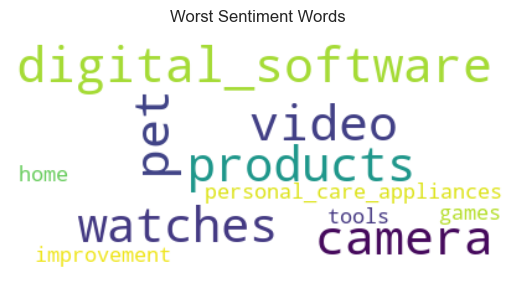

In [54]:
worst_sentiment__words = urban_data_sort_by_feeling.product_category[:25].to_string().replace("$", "s")
wordcloud = WordCloud(background_color='white', relative_scaling=0, normalize_plurals = True).generate(worst_sentiment__words.lower())
plt.title("Worst Sentiment Words")

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [55]:
urban_data_sort_by_feeling[['review_body','product_category','definition_feeling_score']][-15:]

review_body  \
933   This is a wonderful cat hammock! My cat didn't use it when we had it on the floor, but we moved it on a table looking out the window next to our bed and now she sleeps there all the time and loves it! Its great because then she is not in bed waking us up but still next to us. She also loves the ...   
1812  I am a long time Les fan one of my earliest guitar influences as a young boy in the late 50's. I'm still playing guitar and grew up listening to all the greats we all know and loved through the years. Every one of them like Jeff Baxter in this video learned something from this master. Because of...   
792   Again, since my mom in law just had a bad series of mini strokes (and very early dimentia) drs put her on a blood thinner & we were SCARED TO DEATH that she could possibly acidentally take her meds twice.  The nurse where she lives in a independent living apartment strongly recommended this GMS ...   
1491                                                                                                                                                                                                                           I love love love this skin! It looks so nice and went on easy. No problems at all.   
2020  My husband happily contributes to this addiction and keeps choosing cool watches to add to the collection. I like all kinds, but in the category of giant-faced watches with fun, colorful bands, this is a new favorite of mine. I love ocean-y colors and simple designs. I also love the &#34;Indiglo...   
1968  This boy's watch is perfect for that age where kids really want grown-up things, but destroy them in a heartbeat.<br /><br />It has that Otterbox type of nubby, chunky look. Kids that like to figure out settings will really get a kick out of this.<br />Friends have a child on the autism spectrum...   
768   Recieved this cocoa powder recently and just not had a chance to use it.  LOVE the taste.  It's very smooth and mixes nice in the recipes that I use it for.  I do not love the packaging though.  As it is nice and thick, seems sturdy enough however I have found it difficult to close.  Also, every...   
1381  This is a brilliant idea. Very sharp and compact. About the size of a credit card. Fits in a wallet and easy to use.  is going to come in very handy when I go camping. It has a nice sharp blade that is safely stowed away with a little lock when unfolded. My intent for this item is a survival too...   
1205                                                          My husband loves bright lights. I got him this flashlight and he loves it and is amazed at how bright it is. He also loves that it has a zoom and other features. I and he would recommend this to anyone who needs a bright light in their life !!   
1755  Fabulous! Fabulous! FABULOUS!!! I had owned this verion of the opera when I taught a course in opera history  years ago and due to a house fire lost it.  Now, to see this whole extravagent pruduction is like coming home again to old friends whom I knew in another lifetime.<br />To anyone who lov...   
1703  My lil guys favorite 'Franklin' show by far! And a holiday favorite we watch every year now. We discovered this when my son was 3 yrs old, and he really enjoyed it, even though we didn't know the Franklin show very well. Now at 6 yrs old, he still enjoys it very much, and as a mom I've enjoyed i...   
1745  The 'Up Series' represents one of the most fascinating and unusual uses of film in cinema history - a documentary life-long chronicle of the lives of 14 people starting at 7 years old, revisiting them every seven years through age 56 (so far), presented largely through simple, straightforward, b...   
1763  The 'Up Series' represents one of the most fascinating and unusual uses of film in cinema history - a documentary life-long chronicle of the lives of 14 people starting at 7 years old, revisiting them every seven years through age 56 (so far), presented largely through s

In [56]:
max_definition_feeling = data['definition_feeling_score'].max()
min_definition_feeling = data['definition_feeling_score'].min()

bins = [min_definition_feeling-1,-1,1,max_definition_feeling+1]
definition_feeling_range = ['Negative','Neutral','Positive']

data['definition_feeling_category'] = pd.cut(data['definition_feeling_score'],
                                                   bins,
                                                   labels=definition_feeling_range)

In [57]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val=int((pct*total/100.0)+0.5)
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

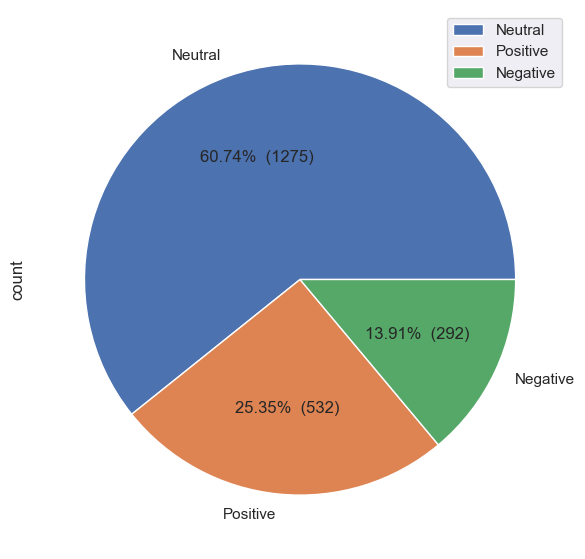

In [58]:
urban_data_definition_feeling_category = data['definition_feeling_category'].value_counts()
urban_data_definition_feeling_category.plot(kind='pie', legend=True, figsize=(7,7), autopct=make_autopct(urban_data_definition_feeling_category));

In [59]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

data['review_headline'].fillna('', inplace=True)
count_vectorizer = CountVectorizer()

feature_vector = count_vectorizer.fit(data.review_headline)
features = count_vectorizer.get_feature_names_out()

In [61]:
count_vectorizer.fit(data.review_headline)
data_features = count_vectorizer.transform(data.review_headline)

In [62]:
data_features.shape

(2099, 1865)

In [63]:
data_features.getnnz()

8540

In [64]:
print("Density of the matrix: ",
    data_features.getnnz()*100 /  
    (data_features.shape[0]* data_features.shape[1]))

Density of the matrix:  0.2181557156669779


In [65]:
data_df = pd.DataFrame(data_features.todense())
data_df.columns = features

In [66]:
data[0:1]

product_title product_category  \
0  GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ only)           Camera   

  verified_purchase review_headline review_body  definition_feeling_score  \
0                 Y      Five Stars          ok                         0   

  definition_feeling_category  
0                     Neutral

In [67]:
data_df.iloc[:1,150:157]

based  batman  batteries  battery  be  beads_3  beat
0      0       0          0        0   0        0     0

In [68]:
features_counts = np.sum(data_features.toarray(), axis = 0)
features_counts_df = pd.DataFrame(dict(features = features , counts = features_counts))

Text(0, 0.5, 'Density')

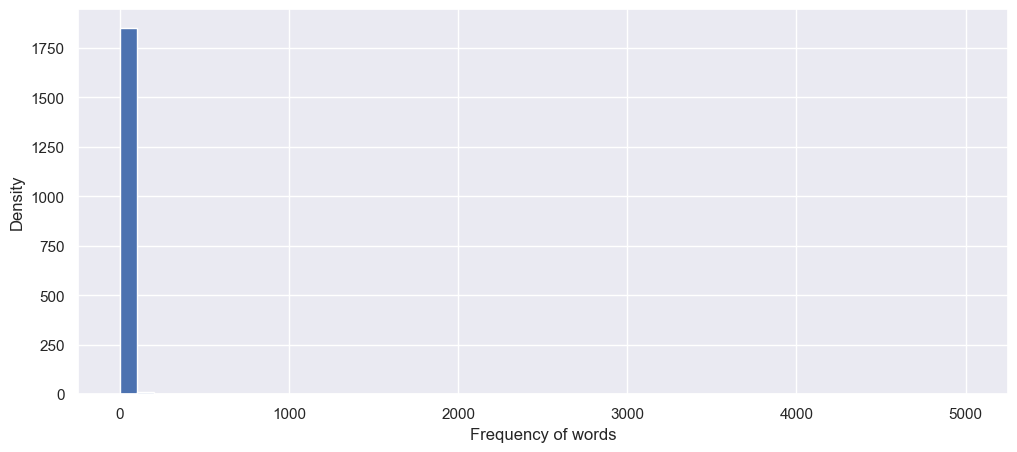

In [69]:
plt.figure(figsize=(12,5))
plt.hist(features_counts_df.counts , bins=50 , range = (0 ,5000))
plt.xlabel('Frequency of words')
plt.ylabel('Density')

In [70]:
len(features_counts_df[features_counts_df.counts == 1])

1172

In [71]:
count_vectorizer = CountVectorizer(max_features=10000)
feature_vector = count_vectorizer.fit(data.review_body)
features = feature_vector.get_feature_names_out()
data_features = count_vectorizer.transform(data.review_body)
features_counts = np.sum(data_features.toarray() , axis = 0)
feature_counts = pd.DataFrame(dict(features = features , counts = features_counts))

In [72]:
feature_counts.sort_values("counts",ascending = False)[0:15]

features  counts
6871      the    3740
475       and    2250
6966       to    2065
3679       it    2048
4673       of    1224
3672       is    1217
6902     this    1137
2834      for    1031
995        br     911
4480       my     813
3488       in     761
7685      you     719
6868     that     718
4704       on     693
7572     with     654

In [73]:
data_df = pd.DataFrame(data_features.todense())
data_df.columns = features
data_df['verified_purchase'] = data.verified_purchase

In [74]:
# Gaussian NB Model Creation

In [75]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(data_features,data.verified_purchase,test_size=0.2,random_state=42)

In [76]:
from sklearn.naive_bayes import GaussianNB
nb_clf2 = GaussianNB()
nb_clf2.fit(X_train.toarray(),Y_train)

GaussianNB()

In [77]:
test_predicted = nb_clf2.predict(X_test.toarray())

In [78]:
from sklearn import metrics
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

           N       0.08      0.43      0.13        44
           Y       0.86      0.40      0.55       376

    accuracy                           0.40       420
   macro avg       0.47      0.42      0.34       420
weighted avg       0.78      0.40      0.50       420



<Axes: >

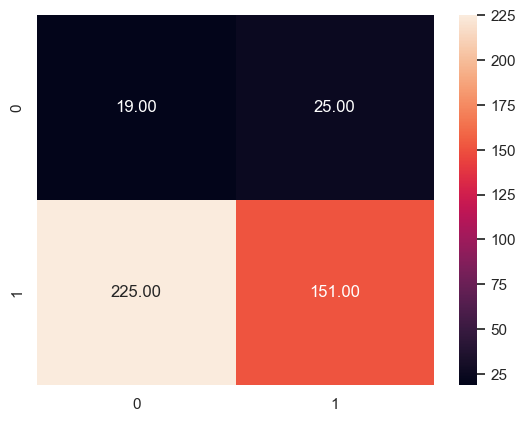

In [79]:
cm = metrics.confusion_matrix(Y_test,test_predicted)
sn.heatmap(cm, annot=True , fmt='.2f')

In [80]:
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()
def get_stemmed_tokens(doc):
  all_tokens = [word for word in nltk.word_tokenize(doc)]
  clean_tokens=[]
  for each_token in all_tokens:
    if re.search('[a-zA-Z]',each_token):
        clean_tokens.append(each_token)
  stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
  return stemmed_tokens

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words ='english' , max_features = 10000 , tokenizer=get_stemmed_tokens , ngram_range=(1,2))
feature_vector = tfidf_vectorizer.fit(data.review_body)
data_features = tfidf_vectorizer.transform(data.review_body)
features = feature_vector.get_feature_names_out()

/Users/arun/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/arun/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 't

In [82]:
from sklearn.naive_bayes import BernoulliNB
X_train , X_test , Y_train , Y_test = train_test_split(data_features,data.verified_purchase,test_size=0.2,random_state=42)
nb_clf3 = BernoulliNB()
nb_clf3.fit(X_train.toarray(),Y_train)
test_predicted = nb_clf3.predict(X_test.toarray())
print(metrics.classification_report(Y_test,test_predicted))

              precision    recall  f1-score   support

           N       0.39      0.20      0.27        44
           Y       0.91      0.96      0.94       376

    accuracy                           0.88       420
   macro avg       0.65      0.58      0.60       420
weighted avg       0.86      0.88      0.87       420



In [83]:
# BERT Model Implementation starts

In [84]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/arun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
import re
from typing import Union, List

class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text
    
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()

In [88]:
# label encode
def label_encode(x):
    if x == 1 or x == 2:
        return 0
    if x == 3:
        return 1
    if x == 5 or x == 4:
        return 2
    
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"
    

In [89]:
dataset.head()

marketplace  customer_id       review_id  product_id  product_parent  \
0          US      2975964  R1NBG94582SJE2  B00I01JQJM       860486164   
1          US     23526356  R273DCA6Y0H9V7  B00TCO0ZAA       292641483   
2          US     52764145   RQVOXO7WUOFK6  B00B7733E0        75825744   
3          US     47348933  R1KWKSF21PO6HO  B006ZN4U34       789352955   
4          US     33680700  R38H3UO1J190GI  B00HUEBGMU        19067902   

                                                                                                                         product_title  \
0                                                                                   GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ only)   
1  Professional 58mm Center Pinch Lens Cap for CANON 18-55mm , 55-250mm , 75-300mm , 50mm 1.4 , 85mm 1.8 , T5I , 70D , 60D , 7D , 7DII   
2                                                      Spy Tec Z12 Motion Activated Intelligent Security Camcorder Surveillance Camera   
3                                                                                  Celestron UpClose G2 10x25 Monocular, Black (71213)   
4      Vidpro XM-L Wired Lavalier microphone - 20' Audio Cable - Transducer type: Electret Condenser FOR Canon VIXIA HF R500 Camcorder   

  product_category  star_rating  helpful_votes  total_votes vine  \
0           Camera            5              0            0    N   
1           Camera            5              0            0    N   
2           Camera            2              1            1    N   
3           Camera            5              0            0    N   
4           Camera            5              1            1    N   

  verified_purchase                               review_headline  \
0                 Y                                    Five Stars   
1                 Y                                    Love it!!!   
2                 Y                    Another Motion Detect Fail   
3                 Y           Exactly what I wanted and expected.   
4                 Y  Good mic at a Good Price...Not Canon Though.   

                                                                                                                                                                                                                                                                                                   review_body  \
0                                                                                                                                                                                                                                                                                                           ok   
1                                                                                                                                                                                                                                                                    Perfect, even sturdier than the original!   
2  If the words, &#34;Cheap Chinese Junk&#34; come to your mind when you see this, then congratulate yourself.  You're pretty close.  One of the most important features of a 'security camera&#34; is the ability to detect motion and record, especially when running on battery and limited storage spac...   
3  Exactly what I wanted and expected. Perfect for hiking or carrying when you are going someplace you MAY need a quick closeup. I bought it to leave in my glovebox so I always have it with me. I've used it a few times already and couldn't be happier with it. For the price, it's definitely worth pi...   
4  I will look past the fact that they tricked me into believing this is a Canon product. It's not by Canon. It's some generic brand that i've never heard of. HOWEVER, it works surprisingly well! The sound quality is actually really good. The wire is actually super long and is perfect for indoor sh...   

  review_date  
0    31/08/15  
1    31/08/15  
2    31/08/15  
3  

In [90]:
# count of ratings
fig = px.histogram(dataset,
             x = 'star_rating',
             title = 'Histogram of Review Rating',
             template = 'ggplot2',
             color = 'star_rating',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [91]:
dataset["label"] = dataset["star_rating"].apply(lambda x: label_encode(x))
dataset["label_name"] = dataset["label"].apply(lambda x: label2name(x))


In [92]:
dataset["review_body"] = dataset["review_body"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))

In [93]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

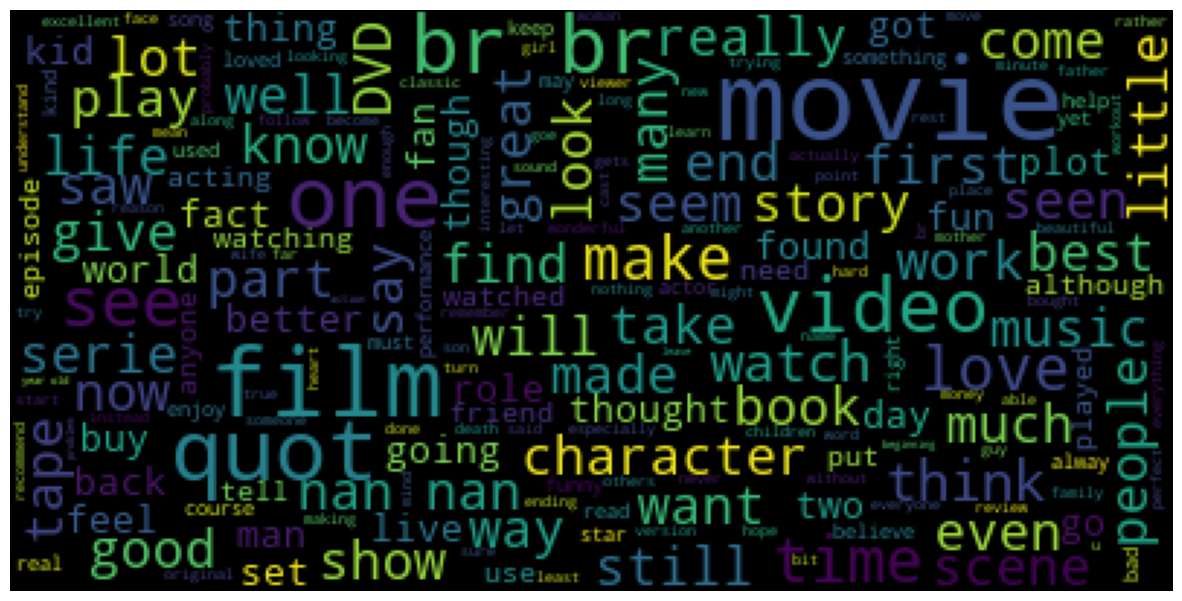

In [94]:
show_wordcloud(df["review_body"].values)

In [95]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=dataset.label_name.value_counts().index,
                             values=dataset.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=dataset.label_name.value_counts().index, y=dataset.label.value_counts().values, marker_color = colors), 1,2)

fig.show()

In [96]:
dataset["tokenized_review"] = dataset.review_body.apply(lambda x: tokenize(x))
dataset["sent_token_length"] = dataset["tokenized_review"].apply(lambda x: len(x.split()))

In [97]:
fig = px.histogram(dataset, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [98]:
(dataset.sent_token_length < 512).mean()


0.9947594092424964

In [99]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

In [100]:
# data tokenize with bert tokenizer
dataset["sent_bert_token_length"] = dataset["review_body"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

Token indices sequence length is longer than the specified maximum sequence length for this model (1164 > 512). Running this sequence through the model will result in indexing errors


In [101]:
fig = px.histogram(dataset, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [102]:
(dataset.sent_bert_token_length < 512).mean()


0.993806574559314

In [103]:
# valvulate char count for each review
dataset['char_count'] = dataset['review_body'].apply(lambda x: len(str(x)))


def plot_dist3(dataset, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(dataset.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

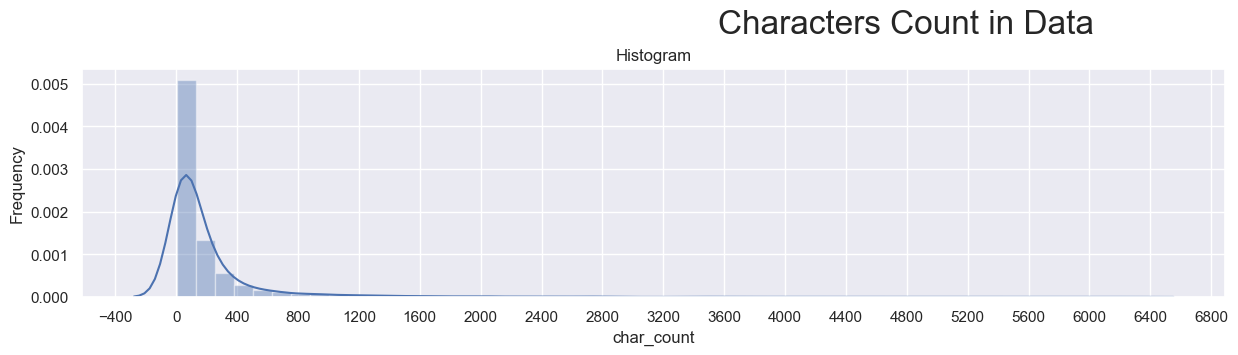

In [104]:
plot_dist3(dataset, 'char_count',
           'Characters Count in Data')

In [105]:
# Creating a new feature for the visualization.
dataset['Character Count'] = dataset['review_body'].apply(lambda x: len(str(x)))


def plot_dist3(dataset, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(dataset.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(dataset.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

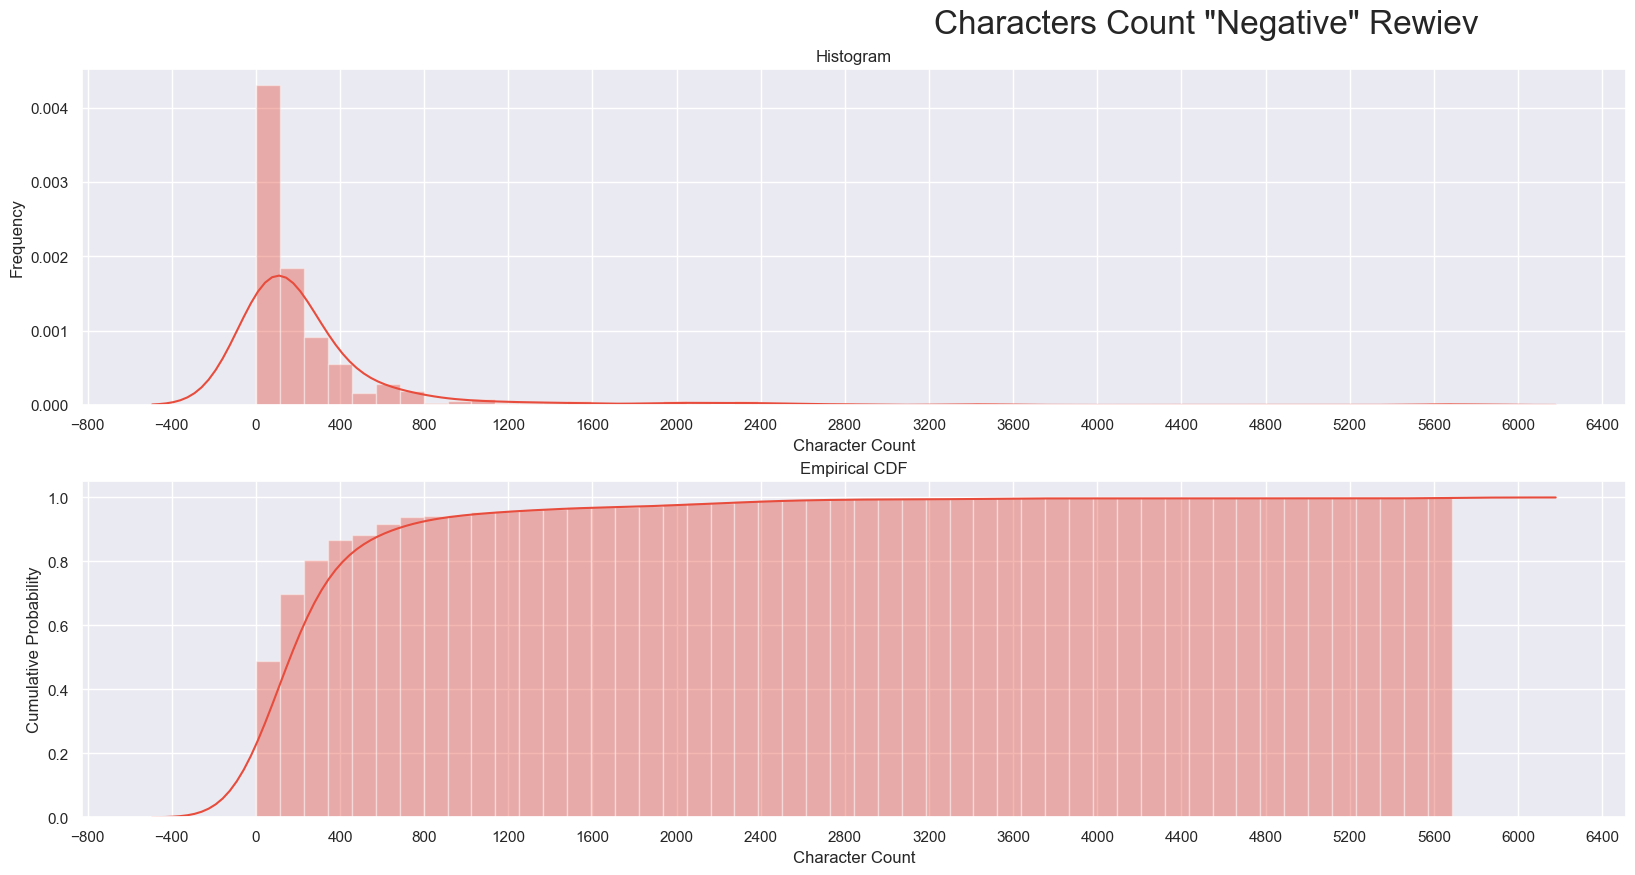

In [106]:
plot_dist3(dataset[dataset['label'] == 0], 'Character Count',
           'Characters Count "Negative" Rewiev')

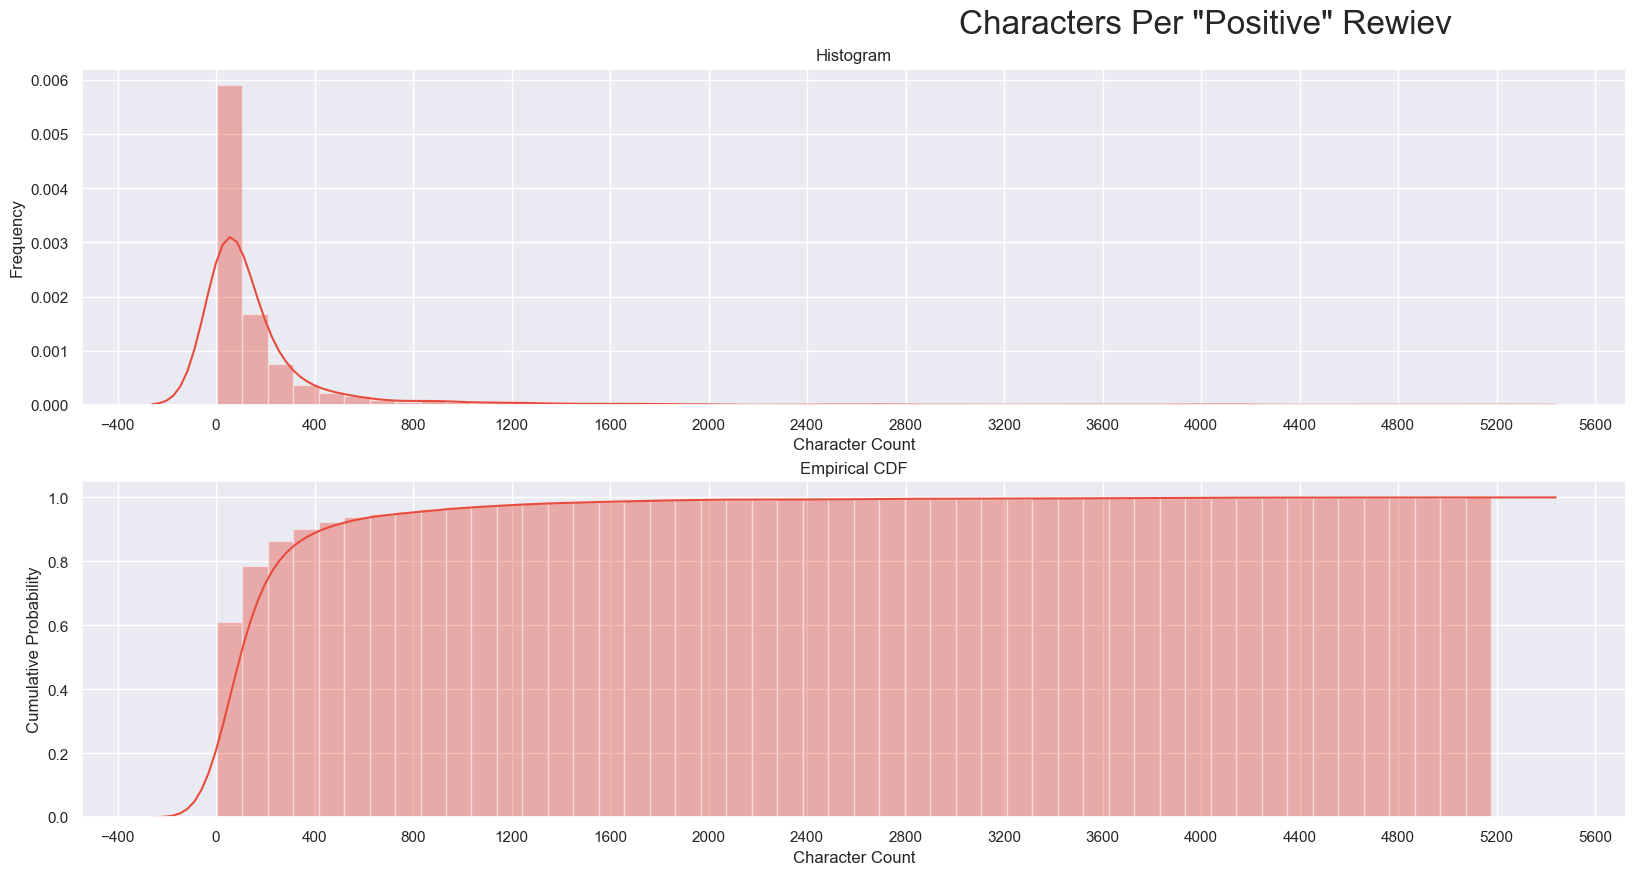

In [107]:
plot_dist3(dataset[dataset['label'] == 2], 'Character Count',
           'Characters Per "Positive" Rewiev')

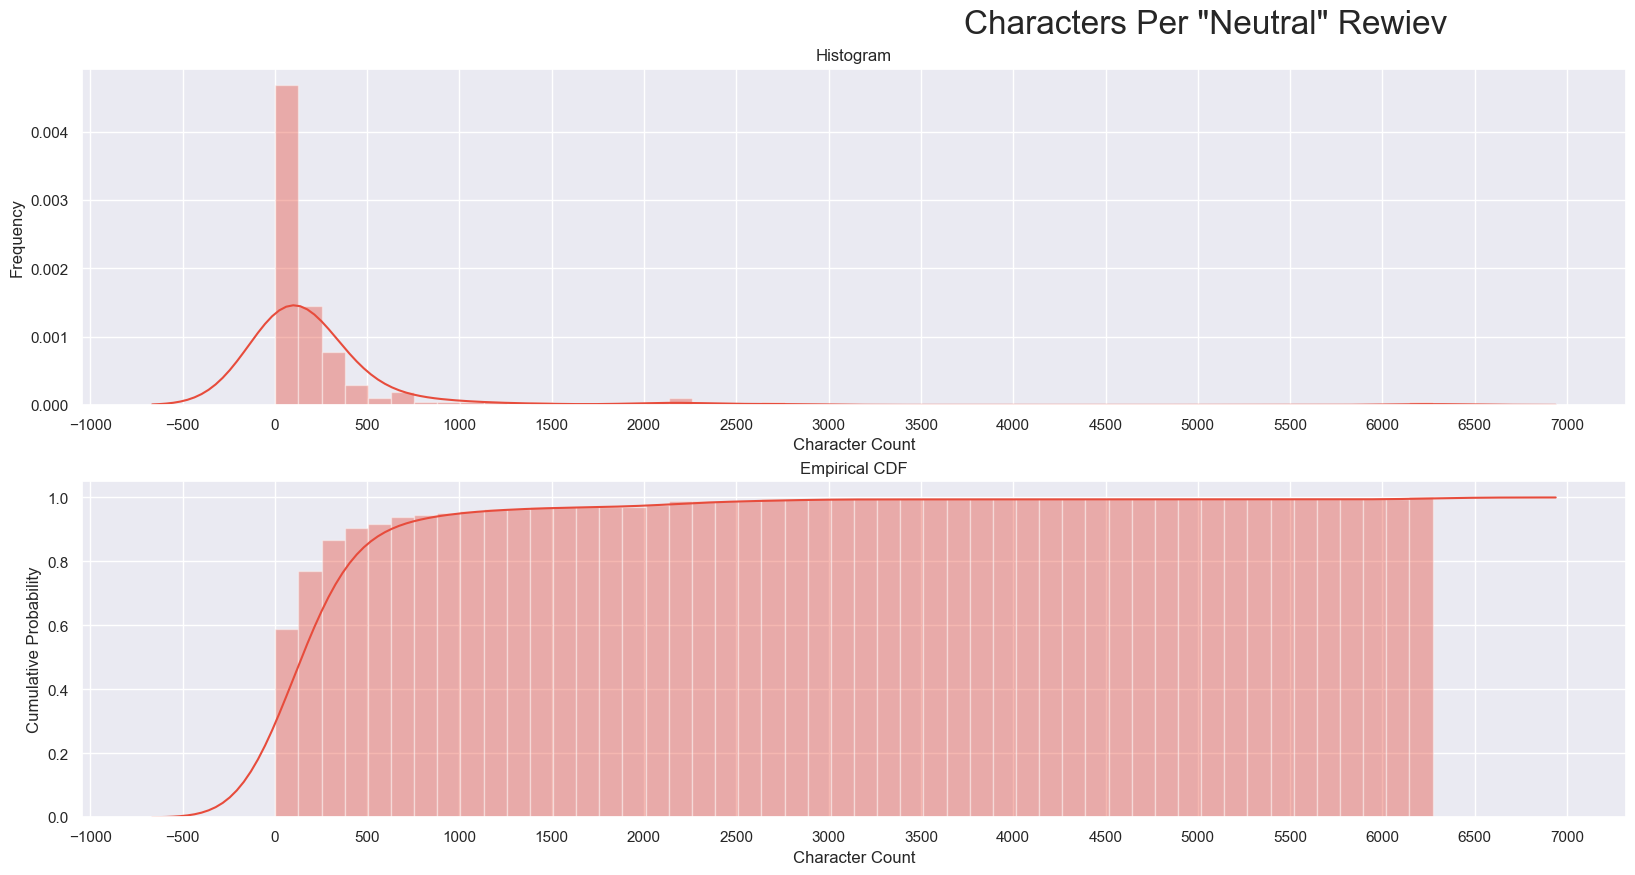

In [108]:
plot_dist3(dataset[dataset['label'] == 1], 'Character Count',
           'Characters Per "Neutral" Rewiev')

In [109]:
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('pozitive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

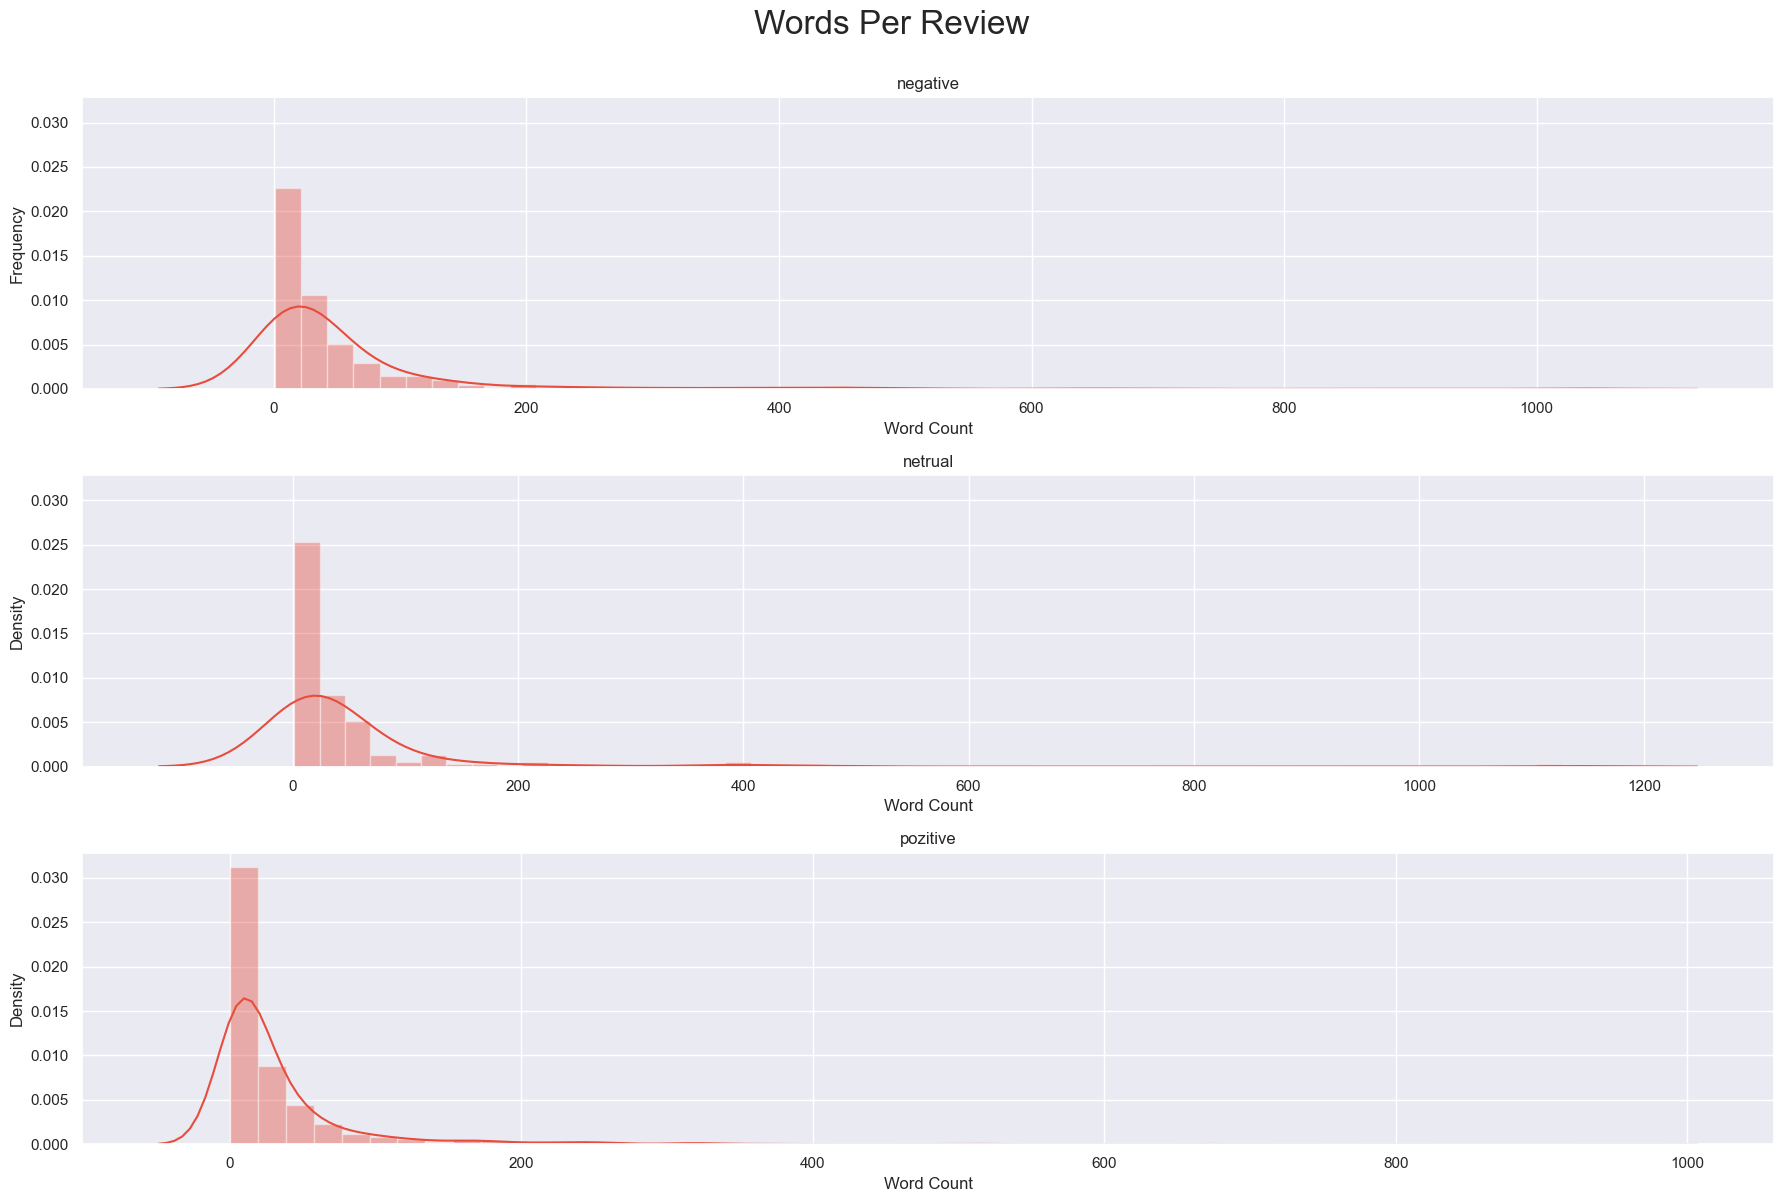

In [110]:
plot_word_number_histogram(dataset[dataset['label'] == 0]['review_body'],
                           dataset[dataset['label'] == 1]['review_body'],
                           dataset[dataset['label'] == 2]['review_body'],
                          )

In [111]:
dataset['tokenized_review'] = dataset['tokenized_review'].apply(lambda x: remove_punct(x))

In [112]:
texts = dataset['tokenized_review']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()



In [113]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = dataset[dataset["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [114]:
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

In [115]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = dataset[dataset["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

In [116]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = dataset[dataset["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show()

In [117]:
import pandas as pd
import numpy as np
import os
import random
from pathlib import Path
import json


In [118]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification


In [119]:
class Config():
    seed_val = 17
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    epochs = 5 
    batch_size = 6
    seq_length = 512
    lr = 2e-5
    eps = 1e-8
    pretrained_model = 'bert-base-uncased'
    test_size=0.15
    random_state=42
    add_special_tokens=True 
    return_attention_mask=True 
    pad_to_max_length=True 
    do_lower_case=False
    return_tensors='pt'

config = Config()


In [120]:
# params will be saved after training
params = {"seed_val": config.seed_val,
    "device":str(config.device),
    "epochs":config.epochs, 
    "batch_size":config.batch_size,
    "seq_length":config.seq_length,
    "lr":config.lr,
    "eps":config.eps,
    "pretrained_model": config.pretrained_model,
    "test_size":config.test_size,
    "random_state":config.random_state,
    "add_special_tokens":config.add_special_tokens,
    "return_attention_mask":config.return_attention_mask,
    "pad_to_max_length":config.pad_to_max_length,
    "do_lower_case":config.do_lower_case,
    "return_tensors":config.return_tensors,
         }

In [121]:
# set random seed and device
import random

device = config.device

random.seed(config.seed_val)
np.random.seed(config.seed_val)
torch.manual_seed(config.seed_val)
torch.cuda.manual_seed_all(config.seed_val)

In [122]:
dataset.head()


marketplace  customer_id       review_id  product_id  product_parent  \
0          US      2975964  R1NBG94582SJE2  B00I01JQJM       860486164   
1          US     23526356  R273DCA6Y0H9V7  B00TCO0ZAA       292641483   
2          US     52764145   RQVOXO7WUOFK6  B00B7733E0        75825744   
3          US     47348933  R1KWKSF21PO6HO  B006ZN4U34       789352955   
4          US     33680700  R38H3UO1J190GI  B00HUEBGMU        19067902   

                                                                                                                         product_title  \
0                                                                                   GoPro Rechargeable Battery 2.0 (HERO3/HERO3+ only)   
1  Professional 58mm Center Pinch Lens Cap for CANON 18-55mm , 55-250mm , 75-300mm , 50mm 1.4 , 85mm 1.8 , T5I , 70D , 60D , 7D , 7DII   
2                                                      Spy Tec Z12 Motion Activated Intelligent Security Camcorder Surveillance Camera   
3                                                                                  Celestron UpClose G2 10x25 Monocular, Black (71213)   
4      Vidpro XM-L Wired Lavalier microphone - 20' Audio Cable - Transducer type: Electret Condenser FOR Canon VIXIA HF R500 Camcorder   

  product_category  star_rating  helpful_votes  total_votes  ...  \
0           Camera            5              0            0  ...   
1           Camera            5              0            0  ...   
2           Camera            2              1            1  ...   
3           Camera            5              0            0  ...   
4           Camera            5              1            1  ...   

                                review_headline  \
0                                    Five Stars   
1                                    Love it!!!   
2                    Another Motion Detect Fail   
3           Exactly what I wanted and expected.   
4  Good mic at a Good Price...Not Canon Though.   

                                                                                                                                                                                                                                                                                                   review_body  \
0                                                                                                                                                                                                                                                                                                           ok   
1                                                                                                                                                                                                                                                                    perfect  even sturdier than the original    
2  if the words    34 cheap chinese junk  34  come to your mind when you see this  then congratulate yourself   you re pretty close   one of the most important features of a  security camera  34  is the ability to detect motion and record  especially when running on battery and limited storage spac...   
3  exactly what i wanted and expected  perfect for hiking or carrying when you are going someplace you may need a quick closeup  i bought it to leave in my glovebox so i always have it with me  i ve used it a few times already and couldn t be happier with it  for the price  it s definitely worth pi...   
4  i will look past the fact that they tricked me into believing this is a canon product  it s not by canon  it s some generic brand that i ve never heard of  however  it works surprisingly well  the sound quality is actually really good  the wire is actually super long and is perfect for indoor sh...   

  review_date label label_name  \
0    31/08/15     2   Positive   
1    31/08/15     2   Positive   
2    31/08/15     0   Negative   
3    31/08/15     2   Positive   
4    

In [123]:
#split train test
from sklearn.model_selection import train_test_split

train_df_, val_df = train_test_split(dataset, 
                                    test_size=0.10, 
                                    random_state=config.random_state, 
                            stratify=dataset.label.values)

In [124]:
train_df_.head()

marketplace  customer_id       review_id  product_id  product_parent  \
1381          US       205909  R14XHJJTHOZMCE  B00ZB67QFA       685840472   
800           BR     12189492  R3PPK12VUVCSG1  B0006VJ6TO       412568457   
1750          CA     36325164  R2N1MLPSGEP7MJ  6301978552       747035756   
428           FR       944929  R214H634N3S1V6  B00N9MUV96       774133855   
374           CO     49171109   RLB75E5BEVOLF  B00UVTEJ7K       996398816   

                                                                                                                                        product_title  \
1381  Credit Card Sized Folding Wallet Knife- This Is the Perfect Pocket or Survival Tool, andIt's Cool, Portable, Practical, and Lightweight with a.   
800                                                            Body Back Companyâ€™s Body Back Buddy Trigger Point Therapy Self Massage Tool - PARENT   
1750                                                                                                                     Shadow of the Thin Man [VHS]   
428                                                                                                       McAfee 2015 Total Protection 3 PC (3-Users)   
374                                                                                                                  FreeRIP MP3 Converter [Download]   

              product_category  star_rating  helpful_votes  total_votes  ...  \
1381                     Tools            5              1            1  ...   
800   Personal_Care_Appliances            5              0            0  ...   
1750                     Video            5              0            0  ...   
428           Digital_Software            5              0            0  ...   
374           Digital_Software            5              0            1  ...   

                                       review_headline  \
1381  This is a brilliant idea. Very sharp and compact   
800                                         Five Stars   
1750                                              Good   
428                                         five stars   
374                                         Five Stars   

                                                                                                                                                                                                                                                                                                      review_body  \
1381  this is a brilliant idea  very sharp and compact  about the size of a credit card  fits in a wallet and easy to use   is going to come in very handy when i go camping  it has a nice sharp blade that is safely stowed away with a little lock when unfolded  my intent for this item is a survival too...   
800                                                                                                                                                                                                                                                                              i love this thing  works great     
1750                                                                                                                                                                                                                                                                                                 as described   
428                                                                                                                                                                                                                                                                                                    five stars   
374                                                                                                                                                                                                                                                     

In [125]:
train_df, test_df = train_test_split(train_df_, 
                                    test_size=0.10, 
                                    random_state=42, 
                            stratify=train_df_.label.values)

In [126]:
# count of unique label  control 
print(len(train_df['label'].unique()))
print(train_df.shape)

3
(1700, 22)


In [127]:
# count of unique label  control 
print(len(val_df['label'].unique()))
print(val_df.shape)


3
(210, 22)


In [128]:
# create tokenizer
tokenizer = BertTokenizer.from_pretrained(config.pretrained_model, 
                                          do_lower_case=config.do_lower_case)

In [129]:
encoded_data_train = tokenizer.batch_encode_plus(
    train_df.review_body.values, 
    add_special_tokens=config.add_special_tokens, 
    return_attention_mask=config.return_attention_mask, 
    pad_to_max_length=config.pad_to_max_length, 
    max_length=config.seq_length, 
    return_tensors=config.return_tensors
)
encoded_data_val = tokenizer.batch_encode_plus(
    val_df.review_body.values, 
    add_special_tokens=config.add_special_tokens, 
    return_attention_mask=config.return_attention_mask, 
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length, 
    return_tensors=config.return_tensors
)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [130]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_df.label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_df.label.values)

In [131]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [132]:
model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [133]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=config.batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=config.batch_size)

In [134]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=config.lr, 
                  eps=config.eps)
                  

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*config.epochs)

In [135]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels, label_dict):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [136]:
def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(config.device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
        
    # calculate avareage val loss
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals

In [137]:
config.device

device(type='cpu')

In [138]:
model.to(config.device)
    
for epoch in tqdm(range(1, config.epochs+1)):
    
    model.train()
    
    loss_train_total = 0
    # allows you to see the progress of the training 
    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(config.device) for b in batch)
        
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    
    tqdm.write(f'F1 Score (Weighted): {val_f1}');
# save model params and other configs 
with Path('params.json').open("w") as f:
    json.dump(params, f, ensure_ascii=False, indent=4)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/284 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.5526833522992707
Validation loss: 0.3612734106768455
F1 Score (Weighted): 0.8526813336629289


Epoch 2:   0%|          | 0/284 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.37125980905027617
Validation loss: 0.34058126088763985
F1 Score (Weighted): 0.8499317675788264


Epoch 3:   0%|          | 0/284 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.2326410224457914
Validation loss: 0.37703476252832585
F1 Score (Weighted): 0.9001005619639162


Epoch 4:   0%|          | 0/284 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.13481663698969987
Validation loss: 0.47864453636076565
F1 Score (Weighted): 0.8917201572373986


Epoch 5:   0%|          | 0/284 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.06462531833471664
Validation loss: 0.5006928292834866
F1 Score (Weighted): 0.8795455397348814


In [139]:
model.load_state_dict(torch.load(f'./_BERT_epoch_3.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [140]:
from sklearn.metrics import classification_report

preds_flat = np.argmax(predictions, axis=1).flatten()
print(classification_report(preds_flat, true_vals))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        36
           1       0.38      0.33      0.35        18
           2       0.93      0.96      0.94       156

    accuracy                           0.88       210
   macro avg       0.72      0.70      0.71       210
weighted avg       0.87      0.88      0.87       210



In [141]:
# Error Analysis

In [143]:
# step by step predictions on dataframe
# We do this to view predictions in the pandas dataframe and easily filter them and perform error analysis.

pred_final = []

for i, row in tqdm(val_df.iterrows(), total=val_df.shape[0]):
    predictions = []

    review = row["review_body"]
    encoded_data_test_single = tokenizer.batch_encode_plus(
    [review], 
    add_special_tokens=config.add_special_tokens, 
    return_attention_mask=config.return_attention_mask, 
    pad_to_max_length=config.pad_to_max_length, 
    max_length=config.seq_length,
    return_tensors=config.return_tensors
    )
    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']

    
    inputs = {'input_ids':      input_ids_test.to(device),
              'attention_mask':attention_masks_test.to(device),
             }

    with torch.no_grad():        
        outputs = model(**inputs)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)
    predictions = np.concatenate(predictions, axis=0)
    pred_final.append(np.argmax(predictions, axis=1).flatten()[0])

  0%|          | 0/210 [00:00<?, ?it/s]

In [144]:
# add pred into val_df
val_df["pred"] = pred_final

In [145]:
#  Add control column for easier wrong and right predictions
control = val_df.pred.values == val_df.label.values
val_df["control"] = control

In [146]:
val_df = val_df[val_df.control == False]


In [147]:
# buraları düzenle bbaaaabbaaaaa
# label to intent mapping
name2label = {"Negative":0,
              "Neutral":1,
             "Positive":2
             }
label2name = {v: k for k, v in name2label.items()}

val_df["pred_name"] = val_df.pred.apply(lambda x: label2name.get(x)) 

In [148]:
from sklearn.metrics import confusion_matrix

# We create a confusion matrix to better observe the classes that the model confuses.
pred_name_values = val_df.pred_name.values
label_values = val_df.label_name.values
confmat = confusion_matrix(label_values, pred_name_values, labels=list(name2label.keys()))

In [149]:
confmat


array([[0, 2, 1],
       [2, 0, 8],
       [3, 4, 0]])

In [150]:
df_confusion_val = pd.crosstab(label_values, pred_name_values)
df_confusion_val

col_0     Negative  Neutral  Positive
row_0                                
Negative         0        2         1
Neutral          2        0         8
Positive         3        4         0

In [151]:
# save confissuan matrix df
df_confusion_val.to_csv("val_df_confusion.csv")

In [152]:
# Inferances

In [153]:
test_df.head()


marketplace  customer_id       review_id  product_id  product_parent  \
1973          US     27124514  R1XLB596BBENH6  B00NMN3YLE       454718935   
705           US     36403183  R3A72XCOA4OPYE  B00EGFIB92       839188910   
2030          US      2060069  R275FISH3I98PF  B00020J0SQ       618820055   
1579          US     45650996  R1ABTTV7050ULL  B00004U4QR       178352694   
1571          FR     32422118   REDEMUD90A5LZ  B0076HD2W8       416708066   

                                                                                                      product_title  \
1973                                   Casio G-Shock GA110GD-9A Classic Series Designer Gold / One Size Men's Watch   
705   Half Pencils with Eraser - Golf, Classroom, Pew - #2 Hexagon, Sharpened, Box of 72. Color: Four Mixed Classic   
2030                                                                                      Timex Porter Street Watch   
1579                                                                        Midway's Greatest Arcade Hits, Volume 1   
1571                                           Zettaguard Wireless PC USB Gaming Receiver for Xbox 360 Compact Disc   

     product_category  star_rating  helpful_votes  total_votes  ...  \
1973          Watches            5              0            0  ...   
705   Office Products            5              0            0  ...   
2030          Watches            4              0            0  ...   
1579      Video Games            5              1            1  ...   
1571      Video Games            4              0            0  ...   

                    review_headline  \
1973                     Five Stars   
705                   nice erasers.   
2030     Familiar band, good value!   
1579                     Five Stars   
1571  Super happy with the purchase   

                                                                                                                                                                                                                               review_body  \
1973                                                                                                                                                                                                                          excelente      
705                                                                                                                                                                                             use in drama club   nice erasers    br       
2030  like the watch face easy to read   bracelet a little large for average size wrist   concerned a out durability of clasp  easy off and on but delicate clasp  appearance is great  attractive design   overall   good value for cost    
1579                                                                                                                                                                                                        excellent price  fast shipping   
1571                                                                                                                                              drivers needed to be manually setup  but other than that  super happy with the purchase    

     review_date label label_name  \
1973    30/08/15     2   Positive   
705     31/08/15     2   Positive   
2030    30/08/15     2   Positive   
1579    30/08/15     2   Positive   
1571    30/08/15     2   Positive   

                                                                                                                                                                                                              tokenized_review  \
1973                                                                                                                                                                                                                 excelente   
705                                                          

In [156]:
encoded_data_test = tokenizer.batch_encode_plus(
    test_df.review_body.values, 
    add_special_tokens=config.add_special_tokens, 
    return_attention_mask=config.return_attention_mask, 
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length, 
    return_tensors=config.return_tensors
)

In [157]:
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_df.label.values)

In [158]:
model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(config.device)

model.load_state_dict(torch.load(f'./_BERT_epoch_3.model', map_location=torch.device('cpu')))

_, predictions_test, true_vals_test = evaluate(dataloader_validation)
# accuracy_per_class(predictions, true_vals, intent2label)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [159]:
from sklearn.metrics import classification_report

preds_flat_test = np.argmax(predictions_test, axis=1).flatten()
print(classification_report(preds_flat_test, true_vals_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        36
           1       0.38      0.50      0.43        12
           2       0.96      0.94      0.95       162

    accuracy                           0.90       210
   macro avg       0.75      0.77      0.75       210
weighted avg       0.92      0.90      0.91       210



In [161]:
pred_final = []

for i, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    predictions = []

    review = row["review_body"]
    encoded_data_test_single = tokenizer.batch_encode_plus(
    [review], 
    add_special_tokens=config.add_special_tokens, 
    return_attention_mask=config.return_attention_mask, 
    pad_to_max_length=config.pad_to_max_length, 
    max_length=config.seq_length,
    return_tensors=config.return_tensors
    )
    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']

    
    inputs = {'input_ids':      input_ids_test.to(device),
              'attention_mask':attention_masks_test.to(device),
             }

    with torch.no_grad():        
        outputs = model(**inputs)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)
    predictions = np.concatenate(predictions, axis=0)
    pred_final.append(np.argmax(predictions, axis=1).flatten()[0])

  0%|          | 0/189 [00:00<?, ?it/s]

In [162]:
# add pred into test
test_df["pred"] = pred_final

In [163]:
#  Add control column for easier wrong and right predictions
control = test_df.pred.values == test_df.label.values
test_df["control"] = control

In [164]:
test_df = test_df[test_df.control == False]


In [165]:
test_df["pred_name"] = test_df.pred.apply(lambda x: label2name.get(x)) 


In [166]:
from sklearn.metrics import confusion_matrix

# We create a confusion matrix to better observe the classes that the model confuses.
pred_name_values = test_df.pred_name.values
label_values = test_df.label_name.values
confmat = confusion_matrix(label_values, pred_name_values, labels=list(name2label.keys()))

In [167]:
confmat


array([[0, 3, 4],
       [3, 0, 7],
       [1, 5, 0]])

In [168]:
df_confusion_test = pd.crosstab(label_values, pred_name_values)
df_confusion_test

col_0     Negative  Neutral  Positive
row_0                                
Negative         0        3         4
Neutral          3        0         7
Positive         1        5         0

In [169]:
pwd

'/Users/arun/Documents/Project/AI Project'